In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns

from matplotlib import animation
from matplotlib.animation import PillowWriter

from scipy.optimize import minimize, curve_fit
from scipy.interpolate import interp1d
from scipy.special import legendre, jv # Legendre Shrodinger polynomial and Laplace Bessel function

from matplotlib.font_manager import FontProperties
from numpy.polynomial.polynomial import Polynomial

import scienceplots

plt.style.use(["science", "notebook", "grid"])

from scipy.stats import norm

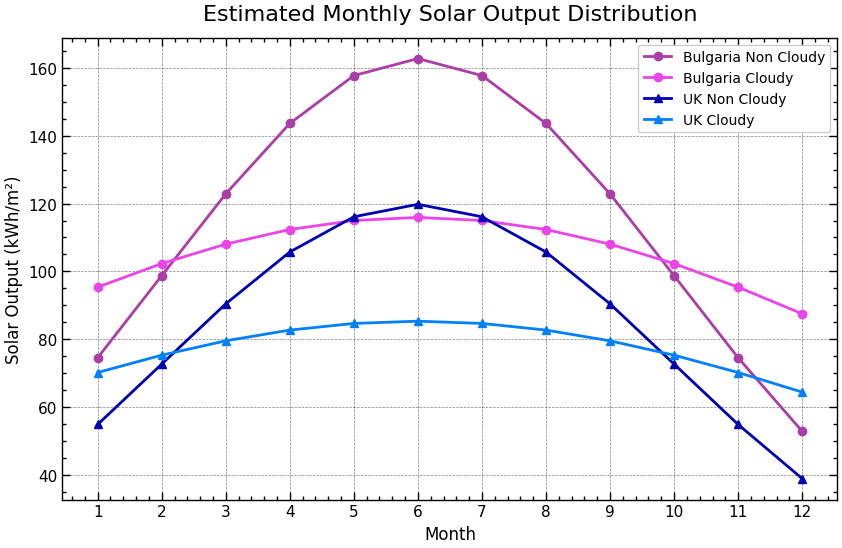

In [5]:
# Annual solar output in kWh/m^2 per year
annual_output_bg = 1410.5
annual_output_uk = 1038.1

# Define the months (for plotting)
months = np.arange(1, 13)

# Assuming June (month 6) is the peak of solar output
peak_month = 6

# Assuming a standard deviation that covers a few months for a smoother transition
std_dev_not_cloudy = 4
std_dev_cloudy = 8

# Generate a Gaussian distribution centered around June for both countries
gaussian_bg_not_cloudy = norm.pdf(months, peak_month, std_dev_not_cloudy)
gaussian_bg_cloudy = norm.pdf(months, peak_month, std_dev_cloudy)

gaussian_uk_not_cloudy = norm.pdf(months, peak_month, std_dev_not_cloudy)
gaussian_uk_cloudy = norm.pdf(months, peak_month, std_dev_cloudy)

# Normalize the distributions so their sum matches the annual output
gaussian_bg_normalized_not_cloudy = (gaussian_bg_not_cloudy / gaussian_bg_not_cloudy.sum()) * annual_output_bg 
gaussian_bg_normalized_cloudy = (gaussian_bg_cloudy / gaussian_bg_cloudy.sum()) * annual_output_bg * 0.9

gaussian_uk_normalized_not_cloudy = (gaussian_uk_not_cloudy / gaussian_uk_not_cloudy.sum()) * annual_output_uk
gaussian_uk_normalized_cloudy = (gaussian_uk_cloudy / gaussian_uk_cloudy.sum()) * annual_output_uk * 0.9

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(months, gaussian_bg_normalized_not_cloudy, label='Bulgaria Non Cloudy', marker='o', color = "#ab3da9")
plt.plot(months, gaussian_bg_normalized_cloudy, label='Bulgaria Cloudy', marker='o', color = "#eb44e8")

plt.plot(months, gaussian_uk_normalized_not_cloudy, label='UK Non Cloudy', marker='^', color = "#0000b3")
plt.plot(months, gaussian_uk_normalized_cloudy, label='UK Cloudy', marker='^', color = "#0080ff")

plt.title('Estimated Monthly Solar Output Distribution', y = 1.02)

plt.xlabel('Month', fontsize = 12)
plt.ylabel('Solar Output (kWh/m²)', fontsize = 12)
plt.xticks(months)

plt.tick_params(axis = 'both', labelsize = 11)
plt.legend(fontsize = 10)
plt.grid(True)
plt.show()


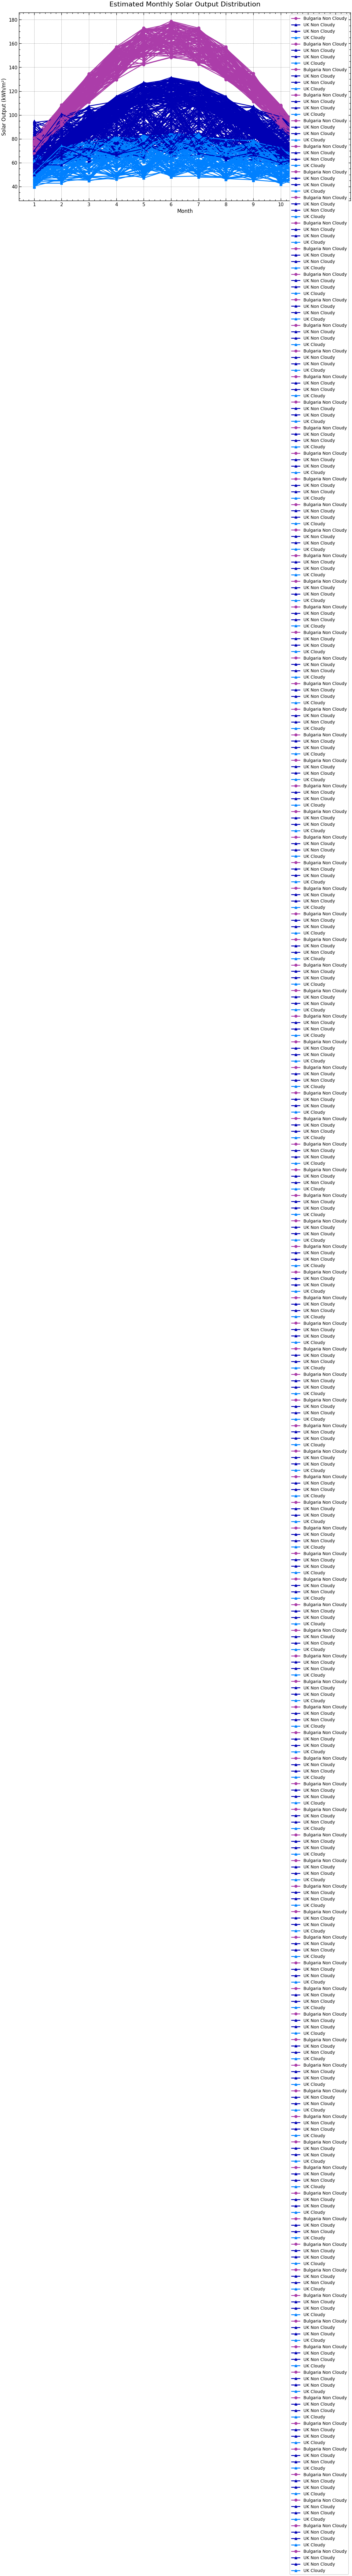

<Figure size 800x600 with 0 Axes>

In [6]:
# Setting the number of iterations (seeds) for the simulation
iterations = 100

# Preparing the figure for plotting
plt.figure(figsize=(14, 8))

# Running the simulations for each scenario
for i in range(iterations):
    # Generating random reduction factors for cloudy scenarios for each month
    reduction_factors_cloudy = np.random.uniform(0.5, 0.9, size=months.size)
    # Generating random correction factors for not cloudy scenarios for each month
    correction_factors_not_cloudy = np.random.uniform(0.9, 1.1, size=months.size)
    
    # Applying the random factors to the distributions
    gaussian_bg_normalized_cloudy_random = (gaussian_bg_cloudy / gaussian_bg_cloudy.sum()) * annual_output_bg * reduction_factors_cloudy
    gaussian_uk_normalized_cloudy_random = (gaussian_uk_cloudy / gaussian_uk_cloudy.sum()) * annual_output_uk * reduction_factors_cloudy
    
    # Applying the correction factors to the not cloudy distributions
    gaussian_bg_normalized_not_cloudy_corrected = gaussian_bg_normalized_not_cloudy * correction_factors_not_cloudy
    gaussian_uk_normalized_not_cloudy_corrected = gaussian_uk_normalized_not_cloudy * correction_factors_not_cloudy
    
    # Plotting the corrected not cloudy and randomized cloudy distributions for Bulgaria
    plt.plot(months, gaussian_bg_normalized_not_cloudy_corrected, label='Bulgaria Non Cloudy', marker='o', color = "#ab3da9")
    plt.plot(months, gaussian_bg_normalized_cloudy_random, label='UK Non Cloudy', marker='^', color = "#0000b3")
    
    # Plotting the corrected not cloudy and randomized cloudy distributions for the UK
    plt.plot(months, gaussian_uk_normalized_not_cloudy_corrected, label='UK Non Cloudy', marker='^', color = "#0000b3")
    plt.plot(months, gaussian_uk_normalized_cloudy_random, label='UK Cloudy', marker='^', color = "#0080ff")

# Final adjustments to the plot
plt.title('Estimated Monthly Solar Output Distribution', y = 1.02)

plt.xlabel('Month', fontsize = 12)
plt.ylabel('Solar Output (kWh/m²)', fontsize = 12)
plt.xticks(months)

plt.tick_params(axis = 'both', labelsize = 11)
plt.legend(fontsize = 10)
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()


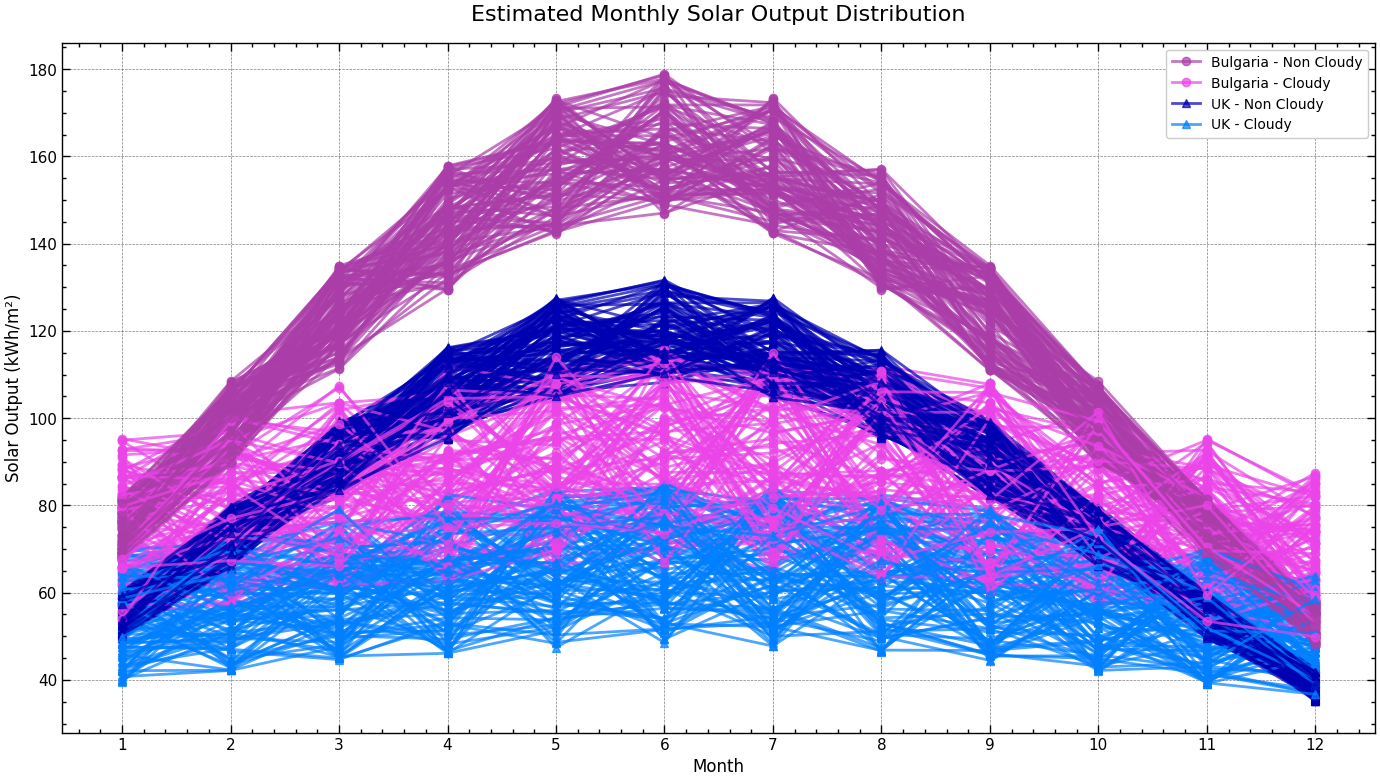

In [7]:
# Re-running the simulations with the specified formatting and adjustments for the legend

plt.figure(figsize=(14, 8))

# Placeholder for the legends to ensure they are added only once
added_legend_bg_not_cloudy = False
added_legend_bg_cloudy = False
added_legend_uk_not_cloudy = False
added_legend_uk_cloudy = False

for i in range(iterations):
    # Random reduction factors for cloudy scenarios and correction factors for not cloudy scenarios
    reduction_factors_cloudy = np.random.uniform(0.5, 0.9, size=months.size)
    correction_factors_not_cloudy = np.random.uniform(0.9, 1.1, size=months.size)
    
    # Adjusting the distributions with random factors
    gaussian_bg_normalized_cloudy_random = (gaussian_bg_cloudy / gaussian_bg_cloudy.sum()) * annual_output_bg * reduction_factors_cloudy
    gaussian_uk_normalized_cloudy_random = (gaussian_uk_cloudy / gaussian_uk_cloudy.sum()) * annual_output_uk * reduction_factors_cloudy
    gaussian_bg_normalized_not_cloudy_corrected = gaussian_bg_normalized_not_cloudy * correction_factors_not_cloudy
    gaussian_uk_normalized_not_cloudy_corrected = gaussian_uk_normalized_not_cloudy * correction_factors_not_cloudy
    
    # Plotting for Bulgaria - Not Cloudy
    if not added_legend_bg_not_cloudy:
        plt.plot(months, gaussian_bg_normalized_not_cloudy_corrected, label='Bulgaria - Non Cloudy', marker='o', color="#ab3da9", alpha=0.7)
        added_legend_bg_not_cloudy = True
    else:
        plt.plot(months, gaussian_bg_normalized_not_cloudy_corrected, marker='o', color="#ab3da9", alpha=0.7)
    
    # Plotting for Bulgaria - Cloudy
    if not added_legend_bg_cloudy:
        plt.plot(months, gaussian_bg_normalized_cloudy_random, label='Bulgaria - Cloudy', marker='o', color="#eb44e8", alpha=0.7)
        added_legend_bg_cloudy = True
    else:
        plt.plot(months, gaussian_bg_normalized_cloudy_random, marker='o', color="#eb44e8", alpha=0.7)

    # Plotting for the UK - Not Cloudy
    if not added_legend_uk_not_cloudy:
        plt.plot(months, gaussian_uk_normalized_not_cloudy_corrected, label='UK - Non Cloudy', marker='^', color="#0000b3", alpha=0.7)
        added_legend_uk_not_cloudy = True
    else:
        plt.plot(months, gaussian_uk_normalized_not_cloudy_corrected, marker='^', color="#0000b3", alpha=0.7)
    
    # Plotting for the UK - Cloudy
    if not added_legend_uk_cloudy:
        plt.plot(months, gaussian_uk_normalized_cloudy_random, label='UK - Cloudy', marker='^', color="#0080ff", alpha=0.7)
        added_legend_uk_cloudy = True
    else:
        plt.plot(months, gaussian_uk_normalized_cloudy_random, marker='^', color="#0080ff", alpha=0.7)

# Applying the requested formatting for the plot
plt.title('Estimated Monthly Solar Output Distribution', y=1.02)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Solar Output (kWh/m²)', fontsize=12)
plt.xticks(months)
plt.tick_params(axis='both', labelsize=11)
plt.legend(fontsize=10, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


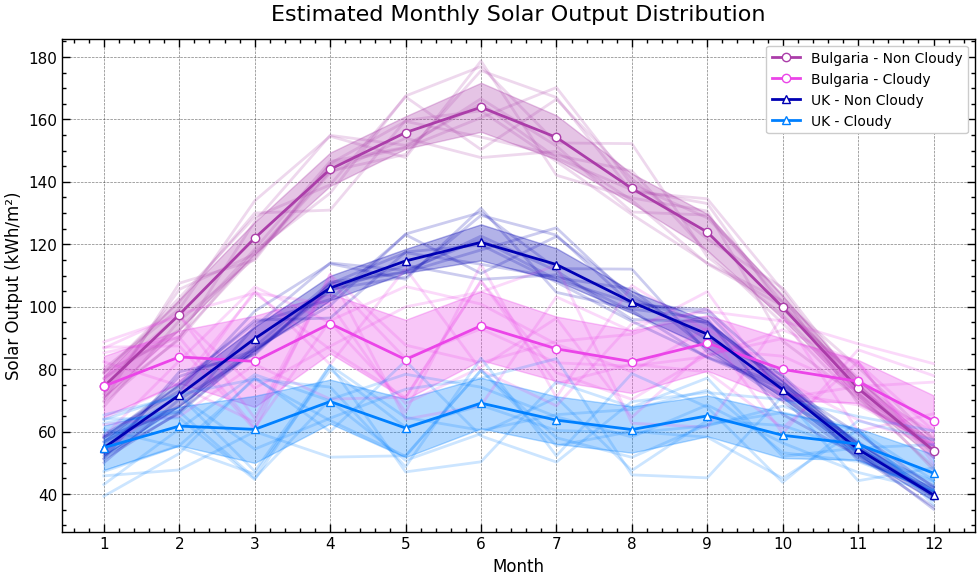

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Setting parameters and generating distributions
annual_output_bg = 1410.5
annual_output_uk = 1038.1
months = np.arange(1, 13)
std_dev_not_cloudy = 4
std_dev_cloudy = 8
iterations = 10

gaussian_bg_not_cloudy = norm.pdf(months, 6, std_dev_not_cloudy)
gaussian_bg_cloudy = norm.pdf(months, 6, std_dev_cloudy)
gaussian_uk_not_cloudy = norm.pdf(months, 6, std_dev_not_cloudy)
gaussian_uk_cloudy = norm.pdf(months, 6, std_dev_cloudy)

# Arrays to store results
results_bg_not_cloudy = np.zeros((iterations, months.size))
results_bg_cloudy = np.zeros((iterations, months.size))
results_uk_not_cloudy = np.zeros((iterations, months.size))
results_uk_cloudy = np.zeros((iterations, months.size))

for i in range(iterations):
    reduction_factors_cloudy = np.random.uniform(0.5, 0.9, size=months.size)
    correction_factors_not_cloudy = np.random.uniform(0.9, 1.1, size=months.size)
    
    results_bg_not_cloudy[i] = (gaussian_bg_not_cloudy / gaussian_bg_not_cloudy.sum()) * annual_output_bg * correction_factors_not_cloudy
    results_bg_cloudy[i] = (gaussian_bg_cloudy / gaussian_bg_cloudy.sum()) * annual_output_bg * reduction_factors_cloudy
    results_uk_not_cloudy[i] = (gaussian_uk_not_cloudy / gaussian_uk_not_cloudy.sum()) * annual_output_uk * correction_factors_not_cloudy
    results_uk_cloudy[i] = (gaussian_uk_cloudy / gaussian_uk_cloudy.sum()) * annual_output_uk * reduction_factors_cloudy

# Function to calculate mean and confidence interval
def calc_mean_confidence_interval(data, confidence=0.95):
    mean = np.mean(data, axis=0)
    sem = scipy.stats.sem(data, axis=0)
    interval = sem * scipy.stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - interval, mean + interval

# Calculate mean and 95% confidence intervals
mean_bg_not_cloudy, ci_lower_bg_not_cloudy, ci_upper_bg_not_cloudy = calc_mean_confidence_interval(results_bg_not_cloudy)
mean_bg_cloudy, ci_lower_bg_cloudy, ci_upper_bg_cloudy = calc_mean_confidence_interval(results_bg_cloudy)
mean_uk_not_cloudy, ci_lower_uk_not_cloudy, ci_upper_uk_not_cloudy = calc_mean_confidence_interval(results_uk_not_cloudy)
mean_uk_cloudy, ci_lower_uk_cloudy, ci_upper_uk_cloudy = calc_mean_confidence_interval(results_uk_cloudy)

# Plotting
plt.figure(figsize=(10, 6))

# Vivid reds for Bulgaria
vivid_red_not_cloudy =  "#ab3da9"
vivid_red_cloudy = "#eb44e8" 


# Plotting Bulgaria with vivid reds
for i in range(iterations):
    plt.plot(months, results_bg_not_cloudy[i], color=vivid_red_not_cloudy, alpha=0.2)
    plt.plot(months, results_bg_cloudy[i], color=vivid_red_cloudy, alpha=0.2)

# Plotting UK with original blues
for i in range(iterations):
    plt.plot(months, results_uk_not_cloudy[i], color="#0000b3", alpha=0.2)
    plt.plot(months, results_uk_cloudy[i], color="#0080ff", alpha=0.2)

# Adding mean lines and confidence intervals for all scenarios
plt.fill_between(months, ci_lower_bg_not_cloudy, ci_upper_bg_not_cloudy, color=vivid_red_not_cloudy, alpha=0.3)
plt.plot(months, mean_bg_not_cloudy, label='Bulgaria - Non Cloudy', marker='o', markerfacecolor = 'white', color=vivid_red_not_cloudy)

plt.fill_between(months, ci_lower_bg_cloudy, ci_upper_bg_cloudy, color=vivid_red_cloudy, alpha=0.3)
plt.plot(months, mean_bg_cloudy, label='Bulgaria - Cloudy', marker='o', markerfacecolor = 'white', color=vivid_red_cloudy)

plt.fill_between(months, ci_lower_uk_not_cloudy, ci_upper_uk_not_cloudy, color="#0000b3", alpha=0.3)
plt.plot(months, mean_uk_not_cloudy, label='UK - Non Cloudy', marker='^', markerfacecolor = 'white', color="#0000b3")

plt.fill_between(months, ci_lower_uk_cloudy, ci_upper_uk_cloudy, color="#0080ff", alpha=0.3)
plt.plot(months, mean_uk_cloudy, label='UK - Cloudy', marker='^', markerfacecolor = 'white',  color="#0080ff")

plt.title('Estimated Monthly Solar Output Distribution', y=1.02)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Solar Output (kWh/m²)', fontsize=12)
plt.xticks(months)
plt.tick_params(axis='both', labelsize=11)
plt.legend(fontsize=10, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig("PVOUT_UK_vs_Bulgaria.png")
plt.show()

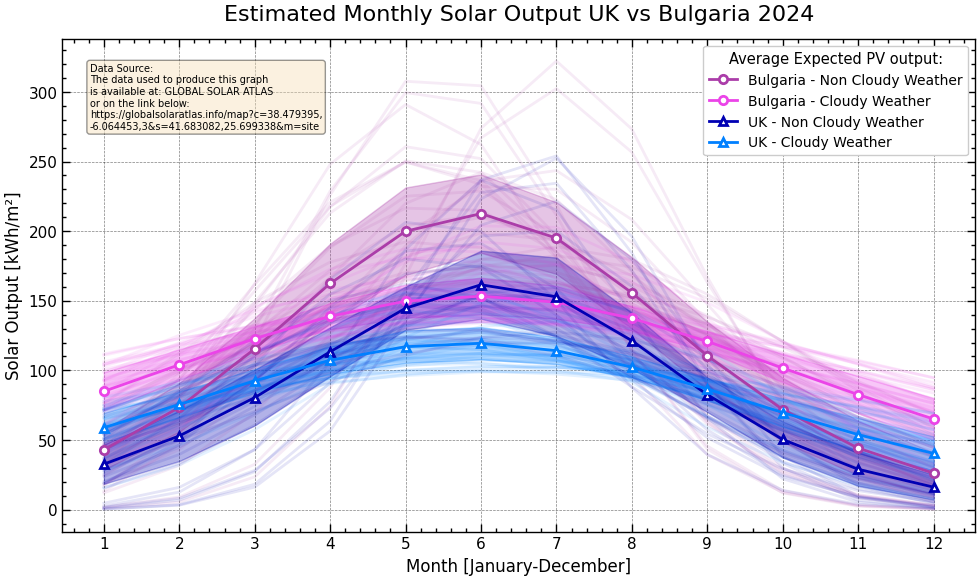

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Basic parameters
months = np.arange(1, 13)
iterations = 30
annual_output_bg = 1410.5
annual_output_uk = 1038.1

# Function to simulate data generation from varying Gaussian distributions
def simulate_varying_gaussians(annual_output, peak_month_variation_range, std_dev_variation_range, iterations, months):
    results = np.zeros((iterations, len(months)))
    for i in range(iterations):
        peak_month = np.random.uniform(*peak_month_variation_range)
        std_dev = np.random.uniform(*std_dev_variation_range)
        distribution = norm.pdf(months, peak_month, std_dev)
        normalized_distribution = (distribution / distribution.sum()) * annual_output
        results[i] = normalized_distribution
    return results

# Define ranges for variations for both scenarios in Bulgaria and the UK
peak_month_variation_range = (5, 7)  # Peak solar output can vary around June
std_dev_variation_range_non_cloudy = (1.5, 4)  # Less variation in non-cloudy scenarios
std_dev_variation_range_cloudy = (2.5, 6.5)  # More variation in cloudy scenarios

# Simulate data for each scenario
results_bg_not_cloudy = simulate_varying_gaussians(annual_output_bg, peak_month_variation_range, std_dev_variation_range_non_cloudy, iterations, months)
results_bg_cloudy = simulate_varying_gaussians(annual_output_bg, peak_month_variation_range, std_dev_variation_range_cloudy, iterations, months)
results_uk_not_cloudy = simulate_varying_gaussians(annual_output_uk, peak_month_variation_range, std_dev_variation_range_non_cloudy, iterations, months)
results_uk_cloudy = simulate_varying_gaussians(annual_output_uk, peak_month_variation_range, std_dev_variation_range_cloudy, iterations, months)

# Proceed with calculating means and confidence intervals, and plotting as before
# This part remains similar to the previous examples, with the inclusion of the newly simulated data

def calc_mean_confidence_interval(data, confidence=0.999):
    mean = np.mean(data, axis=0)
    sem = scipy.stats.sem(data, axis=0)
    interval = sem * scipy.stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - interval, mean + interval

# Calculate mean and 95% confidence intervals
mean_bg_not_cloudy, ci_lower_bg_not_cloudy, ci_upper_bg_not_cloudy = calc_mean_confidence_interval(results_bg_not_cloudy)
mean_bg_cloudy, ci_lower_bg_cloudy, ci_upper_bg_cloudy = calc_mean_confidence_interval(results_bg_cloudy)
mean_uk_not_cloudy, ci_lower_uk_not_cloudy, ci_upper_uk_not_cloudy = calc_mean_confidence_interval(results_uk_not_cloudy)
mean_uk_cloudy, ci_lower_uk_cloudy, ci_upper_uk_cloudy = calc_mean_confidence_interval(results_uk_cloudy)

# Plotting
plt.figure(figsize=(10, 6))

# Vivid reds for Bulgaria
vivid_red_not_cloudy =  "#ab3da9"
vivid_red_cloudy = "#eb44e8" 


# Plotting Bulgaria with vivid reds
for i in range(iterations):
    plt.plot(months, results_bg_not_cloudy[i], color=vivid_red_not_cloudy, alpha=0.1)
    plt.plot(months, results_bg_cloudy[i], color=vivid_red_cloudy, alpha=0.1)

# Plotting UK with original blues
for i in range(iterations):
    plt.plot(months, results_uk_not_cloudy[i], color="#0000b3", alpha=0.1)
    plt.plot(months, results_uk_cloudy[i], color="#0080ff", alpha=0.1)

# Adding mean lines and confidence intervals for all scenarios
plt.fill_between(months, ci_lower_bg_not_cloudy, ci_upper_bg_not_cloudy, color=vivid_red_not_cloudy, alpha=0.3)
plt.plot(months, mean_bg_not_cloudy, label='Bulgaria - Non Cloudy Weather', marker='o', markerfacecolor = 'white',markeredgewidth=2, color=vivid_red_not_cloudy)

plt.fill_between(months, ci_lower_bg_cloudy, ci_upper_bg_cloudy, color=vivid_red_cloudy, alpha=0.3)
plt.plot(months, mean_bg_cloudy, label='Bulgaria - Cloudy Weather', marker='o', markerfacecolor = 'white',markeredgewidth=2, color=vivid_red_cloudy)

plt.fill_between(months, ci_lower_uk_not_cloudy, ci_upper_uk_not_cloudy, color="#0000b3", alpha=0.3)
plt.plot(months, mean_uk_not_cloudy, label='UK - Non Cloudy Weather', marker='^', markerfacecolor = 'white',markeredgewidth=2, color="#0000b3")

plt.fill_between(months, ci_lower_uk_cloudy, ci_upper_uk_cloudy, color="#0080ff", alpha=0.3)
plt.plot(months, mean_uk_cloudy, label='UK - Cloudy Weather', marker='^', markerfacecolor = 'white', markeredgewidth=2, color="#0080ff")


textstr = 'Data Source:\nThe data used to produce this graph\nis available at: GLOBAL SOLAR ATLAS\nor on the link below: \nhttps://globalsolaratlas.info/map?c=38.479395,\n-6.064453,3&s=41.683082,25.699338&m=site'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
# Place the text box. Adjust the position (x, y) and the alignment (text alignment) as needed.
plt.text(0.03, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7, verticalalignment='top', bbox=props)


plt.title('Estimated Monthly Solar Output UK vs Bulgaria 2024', y=1.02)
plt.xlabel('Month [January-December]', fontsize=12)
plt.ylabel('Solar Output [kWh/m²]', fontsize=12)
plt.xticks(months)
plt.tick_params(axis='both', labelsize=11)
plt.legend(title = "Average Expected PV output:", title_fontproperties=FontProperties(size=10.5),  fontsize=10, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig("PVOUT_UK_vs_Bulgaria.png")
plt.show()


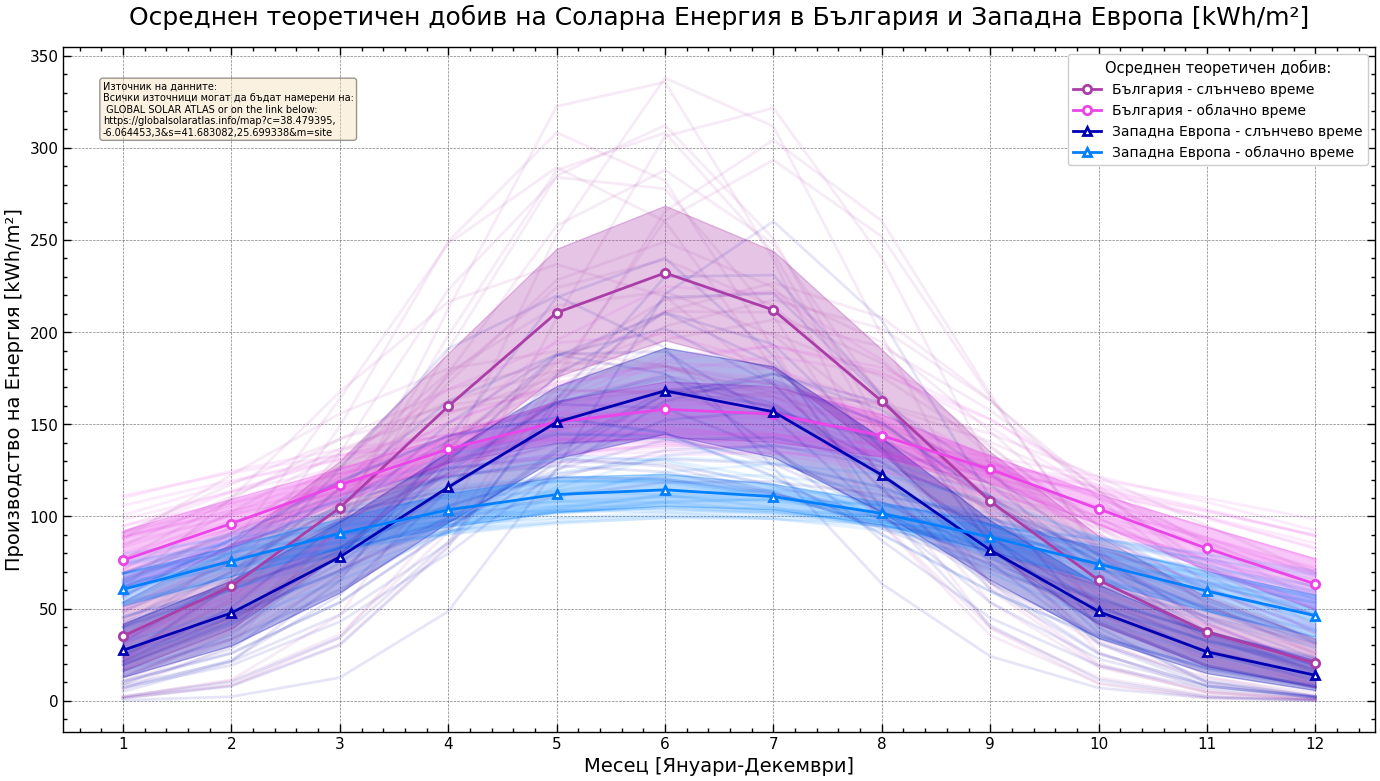

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Basic parameters
months = np.arange(1, 13)
iterations = 30
annual_output_bg = 1410.5
annual_output_uk = 1038.1

# Function to simulate data generation from varying Gaussian distributions
def simulate_varying_gaussians(annual_output, peak_month_variation_range, std_dev_variation_range, iterations, months):
    results = np.zeros((iterations, len(months)))
    for i in range(iterations):
        peak_month = np.random.uniform(*peak_month_variation_range)
        std_dev = np.random.uniform(*std_dev_variation_range)
        distribution = norm.pdf(months, peak_month, std_dev)
        normalized_distribution = (distribution / distribution.sum()) * annual_output
        results[i] = normalized_distribution
    return results

# Define ranges for variations for both scenarios in Bulgaria and the UK
peak_month_variation_range = (5, 7)  # Peak solar output can vary around June
std_dev_variation_range_non_cloudy = (1.5, 4)  # Less variation in non-cloudy scenarios
std_dev_variation_range_cloudy = (2.5, 6.5)  # More variation in cloudy scenarios

# Simulate data for each scenario
results_bg_not_cloudy = simulate_varying_gaussians(annual_output_bg, peak_month_variation_range, std_dev_variation_range_non_cloudy, iterations, months)
results_bg_cloudy = simulate_varying_gaussians(annual_output_bg, peak_month_variation_range, std_dev_variation_range_cloudy, iterations, months)
results_uk_not_cloudy = simulate_varying_gaussians(annual_output_uk, peak_month_variation_range, std_dev_variation_range_non_cloudy, iterations, months)
results_uk_cloudy = simulate_varying_gaussians(annual_output_uk, peak_month_variation_range, std_dev_variation_range_cloudy, iterations, months)

# Proceed with calculating means and confidence intervals, and plotting as before
# This part remains similar to the previous examples, with the inclusion of the newly simulated data

def calc_mean_confidence_interval(data, confidence=0.999):
    mean = np.mean(data, axis=0)
    sem = scipy.stats.sem(data, axis=0)
    interval = sem * scipy.stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - interval, mean + interval

# Calculate mean and 95% confidence intervals
mean_bg_not_cloudy, ci_lower_bg_not_cloudy, ci_upper_bg_not_cloudy = calc_mean_confidence_interval(results_bg_not_cloudy)
mean_bg_cloudy, ci_lower_bg_cloudy, ci_upper_bg_cloudy = calc_mean_confidence_interval(results_bg_cloudy)
mean_uk_not_cloudy, ci_lower_uk_not_cloudy, ci_upper_uk_not_cloudy = calc_mean_confidence_interval(results_uk_not_cloudy)
mean_uk_cloudy, ci_lower_uk_cloudy, ci_upper_uk_cloudy = calc_mean_confidence_interval(results_uk_cloudy)

# Plotting
plt.figure(figsize=(14, 8))

# Vivid reds for Bulgaria
vivid_red_not_cloudy =  "#ab3da9"
vivid_red_cloudy = "#eb44e8" 


# Plotting Bulgaria with vivid reds
for i in range(iterations):
    plt.plot(months, results_bg_not_cloudy[i], color=vivid_red_not_cloudy, alpha=0.1)
    plt.plot(months, results_bg_cloudy[i], color=vivid_red_cloudy, alpha=0.1)

# Plotting UK with original blues
for i in range(iterations):
    plt.plot(months, results_uk_not_cloudy[i], color="#0000b3", alpha=0.1)
    plt.plot(months, results_uk_cloudy[i], color="#0080ff", alpha=0.1)

# Adding mean lines and confidence intervals for all scenarios
plt.fill_between(months, ci_lower_bg_not_cloudy, ci_upper_bg_not_cloudy, color=vivid_red_not_cloudy, alpha=0.3)
plt.plot(months, mean_bg_not_cloudy, label='България - слънчево време', marker='o', markerfacecolor = 'white',markeredgewidth=2, color=vivid_red_not_cloudy)

plt.fill_between(months, ci_lower_bg_cloudy, ci_upper_bg_cloudy, color=vivid_red_cloudy, alpha=0.3)
plt.plot(months, mean_bg_cloudy, label='България - облачно време', marker='o', markerfacecolor = 'white',markeredgewidth=2, color=vivid_red_cloudy)

plt.fill_between(months, ci_lower_uk_not_cloudy, ci_upper_uk_not_cloudy, color="#0000b3", alpha=0.3)
plt.plot(months, mean_uk_not_cloudy, label='Западна Европа - слънчево време', marker='^', markerfacecolor = 'white',markeredgewidth=2, color="#0000b3")

plt.fill_between(months, ci_lower_uk_cloudy, ci_upper_uk_cloudy, color="#0080ff", alpha=0.3)
plt.plot(months, mean_uk_cloudy, label='Западна Европа - облачно време', marker='^', markerfacecolor = 'white', markeredgewidth=2, color="#0080ff")


textstr = 'Източник на данните:\nВсички източници могат да бъдат намерени на:\n GLOBAL SOLAR ATLAS or on the link below: \nhttps://globalsolaratlas.info/map?c=38.479395,\n-6.064453,3&s=41.683082,25.699338&m=site'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
# Place the text box. Adjust the position (x, y) and the alignment (text alignment) as needed.
plt.text(0.03, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7, verticalalignment='top', bbox=props)


plt.title('Осреднен теоретичен добив на Соларна Енергия в България и Западна Европа [kWh/m²]', fontsize=18, y=1.02)
plt.xlabel('Месец [Януари-Декември]', fontsize=14)
plt.ylabel('Производство на Енергия [kWh/m²]', fontsize=14)
plt.xticks(months)
plt.tick_params(axis='both', labelsize=11)
plt.legend(title = "Осреднен теоретичен добив:", title_fontproperties=FontProperties(size=10.5),  fontsize=10, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig("PVOUT_Bulgaria_bulgarski.png")
plt.show()

In [11]:
def bootstrap_hourly(data, num_samples, alpha):
    """
    Perform bootstrapping for each hour across all days and calculate confidence intervals.
    
    Parameters:
    data (2D array): Daily data for each hour.
    num_samples (int): Number of bootstrap samples.
    alpha (float): Significance level for confidence interval.
    
    Returns:
    Tuple of arrays: (means, ci_lowers, ci_uppers)
    """
    n_hours = data.shape[1]  # Number of hours
    means = np.zeros(n_hours)
    ci_lowers = np.zeros(n_hours)
    ci_uppers = np.zeros(n_hours)
    
    for hour in range(n_hours):
        hourly_data = data[:, hour]
        bootstrap_stats = np.array([np.mean(np.random.choice(hourly_data, size=hourly_data.shape[0], replace=True)) for _ in range(num_samples)])
        means[hour] = np.mean(bootstrap_stats)
        ci_lowers[hour] = np.percentile(bootstrap_stats, (alpha/2)*100)
        ci_uppers[hour] = np.percentile(bootstrap_stats, (1-alpha/2)*100)
        
    return means, ci_lowers, ci_uppers


In [12]:
battery_rack_price_per_kwh = 135 * 1.7 # dollars * LEV conversion
battery_cable_price_per_kwh = 20
foundations_battery_racks = 24000
battery_capacity = 1000 #kWh

battery_lifetime_operational_cycles = 5000 # 5000 cycles 

data_points = [
    [146.84, 174.52, 176.89, 178.16, 74.89, 60.55, 96.87],
    [167.32, 168.01, 133.25, 172.6, 47.12, 60.77, 93.49],
    [138.65, 156.47, 113.44, 162.33, 54.7, 36.16, 90.77],
    [136.56, 142.89, 106.96, 149.62, 24.25, 19.32, 85.78],
    [156.47, 163.9, 109.49, 149.62, 20.2, 39.1, 85.16],
    [186.06, 194.74, 184.57, 153.92, 56.68, 101.66, 103.42],
    [202.17, 209.98, 196.29, 148.62, 71.66, 195.58, 164.04],
    [238.63, 238.61, 236.11, 169.34, 168.49, 215.14, 180.46],
    [238.63, 201.53, 217.37, 132.74, 80.11, 181.6, 163.8],
    [182.99, 173.38, 188.42, 118.8, 75.67, 148.7, 139.63],
    [162.29, 169.88, 159.65, 103.54, 58.13, 114.01, 118.74],
    [150.77, 158.97, 149.43, 88.42, 50.26, 91.92, 93.25],
    [146.51, 153.16, 137.98, 81.26, 37.94, 71.11, 87.99],
    [141.58, 156.45, 136.91, 79.5, 26.72, 62.04, 85.55],
    [160.81, 164.54, 150.76, 86.53, 58.32, 115.61, 112.26],
    [189.72, 188.44, 176.92, 144.73, 166.25, 145.81, 138.14],
    [238.61, 200.59, 212.34, 176.92, 166.68, 162.98, 148.21],
    [238.63, 238.63, 231.94, 208.43, 185.78, 191.95, 180.95],
    [240, 256.16, 237.67, 219.05, 202.51, 180.35, 192.59],
    [238.61, 238.61, 220.4, 189.81, 172.17, 170.8, 173.76],
    [238.61, 216.45, 213.19, 198.32, 209.51, 161.83, 167.83],
    [198.26, 211.19, 186.82, 176.92, 126.03, 147.12, 147.78],
    [198.63, 194.57, 175.85, 120.67, 109.33, 131.33, 118.27],
    [174.07, 185.22, 149.56, 98.57, 87.54, 111.62, 105.18],
]

# Creating a numpy array from the list
data_array = np.array(data_points).T  # 24 rows (hours) and 7 columns (days)

# Define the hourly array based on the number of hours in data_array
hours_array = np.arange(24)

print(data_array)

DAYS_DICT = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}


COLORS = ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45"]


#print(data_array)

[[146.84 167.32 138.65 136.56 156.47 186.06 202.17 238.63 238.63 182.99
  162.29 150.77 146.51 141.58 160.81 189.72 238.61 238.63 240.   238.61
  238.61 198.26 198.63 174.07]
 [174.52 168.01 156.47 142.89 163.9  194.74 209.98 238.61 201.53 173.38
  169.88 158.97 153.16 156.45 164.54 188.44 200.59 238.63 256.16 238.61
  216.45 211.19 194.57 185.22]
 [176.89 133.25 113.44 106.96 109.49 184.57 196.29 236.11 217.37 188.42
  159.65 149.43 137.98 136.91 150.76 176.92 212.34 231.94 237.67 220.4
  213.19 186.82 175.85 149.56]
 [178.16 172.6  162.33 149.62 149.62 153.92 148.62 169.34 132.74 118.8
  103.54  88.42  81.26  79.5   86.53 144.73 176.92 208.43 219.05 189.81
  198.32 176.92 120.67  98.57]
 [ 74.89  47.12  54.7   24.25  20.2   56.68  71.66 168.49  80.11  75.67
   58.13  50.26  37.94  26.72  58.32 166.25 166.68 185.78 202.51 172.17
  209.51 126.03 109.33  87.54]
 [ 60.55  60.77  36.16  19.32  39.1  101.66 195.58 215.14 181.6  148.7
  114.01  91.92  71.11  62.04 115.61 145.81 162.98 191.9

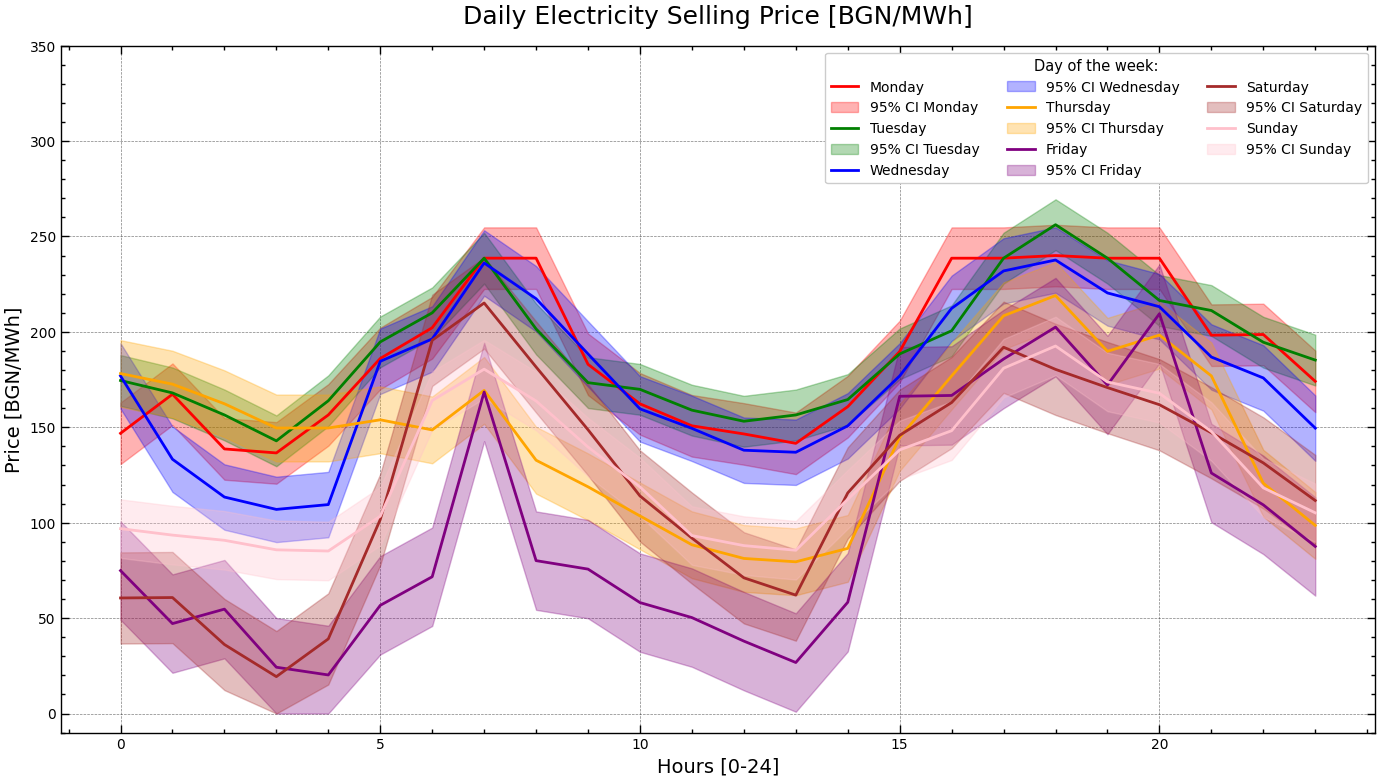

In [13]:
def calc_confidence_intervals_for_day(hourly_data, confidence=0.95):
    """
    Calculate confidence intervals for a single day's hourly data.
    
    Parameters:
    hourly_data (1D array): Hourly data for a single day.
    confidence (float): Confidence level for the interval.
    
    Returns:
    ci_lower (1D array): Lower bounds of the confidence intervals for each hour.
    ci_upper (1D array): Upper bounds of the confidence intervals for each hour.
    """
    # Initialize arrays to hold the lower and upper bounds for each hour
    ci_lower = np.zeros(len(hourly_data))
    ci_upper = np.zeros(len(hourly_data))
    
    # Loop over each hour in the day's data
    for hour in range(len(hourly_data)):
        # Since we're dealing with single values per hour, simulate a distribution
        # Here, you might want to adjust based on your actual data distribution or use a different method
        # This is a placeholder step; for real data, consider bootstrapping or another method as needed
        sem = scipy.stats.sem(hourly_data) if len(hourly_data) > 1 else 0
        h = sem * scipy.stats.t.ppf((1 + confidence) / 2, len(hourly_data)-1)
        mean = hourly_data[hour]
        ci_lower[hour], ci_upper[hour] = mean - h, mean + h
        
        if ci_lower[hour] < 0:
            ci_lower[hour] = 0
    
    return ci_lower, ci_upper

# Define COLORS array for plotting if not already defined
COLORS = ["red", "green", "blue", "orange", "purple", "brown", "pink"]

# Assuming data_array and hours_array are defined as before
plt.figure(figsize=(14, 8))

for day in range(data_array.shape[0]):  # Iterate through each day
    ci_lowers, ci_uppers = calc_confidence_intervals_for_day(data_array[day], 0.95)
    plt.plot(hours_array, data_array[day, :], label=f"{DAYS_DICT[day]}", color=COLORS[day % len(COLORS)])
    plt.fill_between(hours_array, ci_lowers, ci_uppers, color=COLORS[day % len(COLORS)], alpha=0.3, label=f'95% CI {DAYS_DICT[day]}')

plt.title('Daily Electricity Selling Price [BGN/MWh]', fontsize=18, y = 1.02)
plt.xlabel('Hours [0-24]', fontsize=14)
plt.ylabel('Price [BGN/MWh]', fontsize=14)
plt.legend(title="Day of the week:", title_fontproperties=FontProperties(size=10.5), fontsize=10, loc="upper right", ncol=3)
plt.grid(True)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(-10, 350)
plt.tight_layout()
plt.savefig("images\\Daily_Electricity_Selling_Price.png")
plt.show()

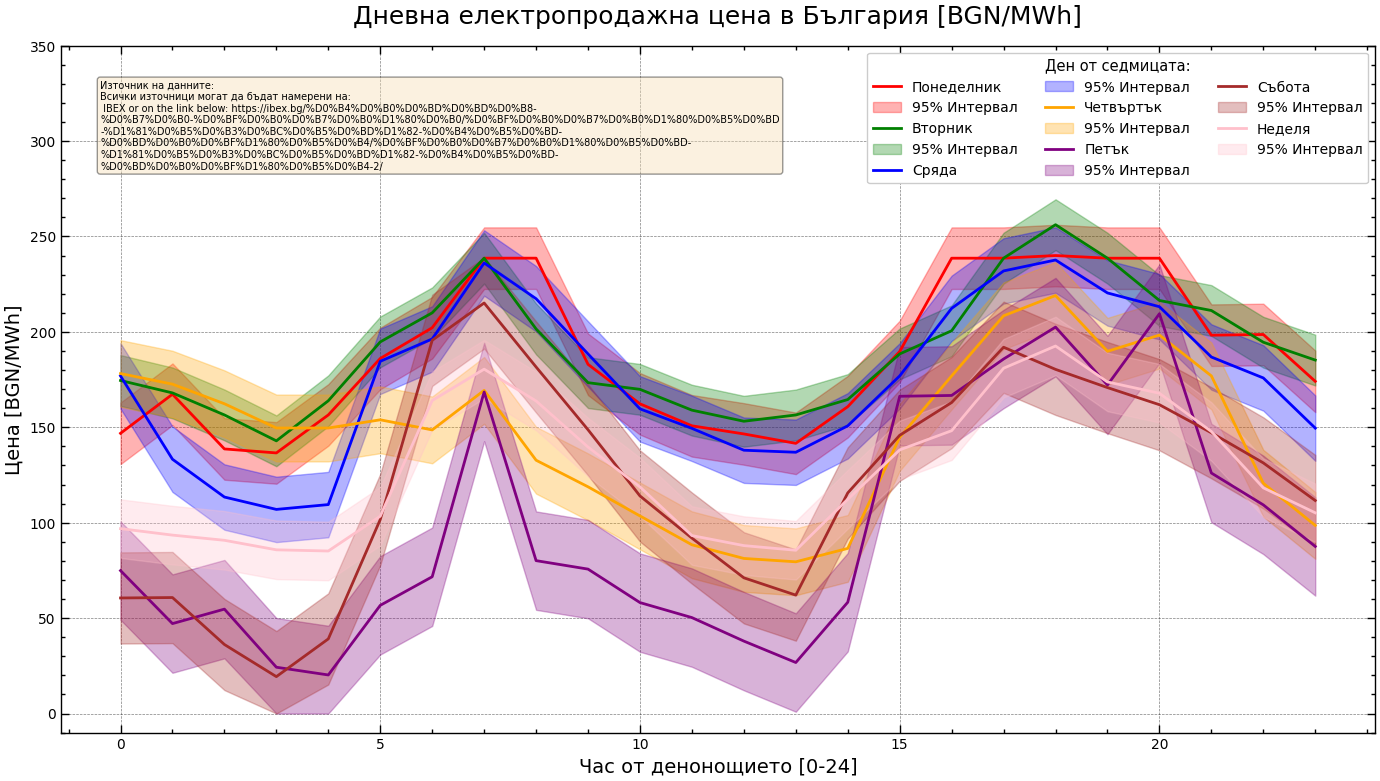

In [14]:
# Define COLORS array for plotting if not already defined
COLORS = ["red", "green", "blue", "orange", "purple", "brown", "pink"]

DAYS_DICT = {
    0: "Понеделник",
    1: "Вторник",
    2: "Сряда",
    3: "Четвъртък",
    4: "Петък",
    5: "Събота",
    6: "Неделя"
}

# Assuming data_array and hours_array are defined as before
plt.figure(figsize=(14, 8))

for day in range(data_array.shape[0]):  # Iterate through each day
    ci_lowers, ci_uppers = calc_confidence_intervals_for_day(data_array[day], 0.95)
    plt.plot(hours_array, data_array[day, :], label=f"{DAYS_DICT[day]}", color=COLORS[day % len(COLORS)])
    plt.fill_between(hours_array, ci_lowers, ci_uppers, color=COLORS[day % len(COLORS)], alpha=0.3, label=f'95% Интервал')


textstr = 'Източник на данните:\nВсички източници могат да бъдат намерени на:\n IBEX or on the link below: https://ibex.bg/%D0%B4%D0%B0%D0%BD%D0%BD%D0%B8-\n%D0%B7%D0%B0-%D0%BF%D0%B0%D0%B7%D0%B0%D1%80%D0%B0/%D0%BF%D0%B0%D0%B7%D0%B0%D1%80%D0%B5%D0%BD\n-%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82-%D0%B4%D0%B5%D0%BD-\n%D0%BD%D0%B0%D0%BF%D1%80%D0%B5%D0%B4/%D0%BF%D0%B0%D0%B7%D0%B0%D1%80%D0%B5%D0%BD-\n%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82-%D0%B4%D0%B5%D0%BD-\n%D0%BD%D0%B0%D0%BF%D1%80%D0%B5%D0%B4-2/'

plt.text(0.03, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7, verticalalignment='top', bbox=props)
plt.title('Дневна електропродажна цена в България [BGN/MWh]', fontsize=18, y = 1.02)
plt.xlabel('Час от денонощието [0-24]', fontsize=14)
plt.ylabel('Цена [BGN/MWh]', fontsize=14)
plt.legend(title="Ден от седмицата:", title_fontproperties=FontProperties(size=10.5), fontsize=10, loc="upper right", ncol=3)
plt.grid(True)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(-10, 350)
plt.tight_layout()
plt.savefig("images\\Daily_Electricity_Selling_Price_bulgarski.png")
plt.show()

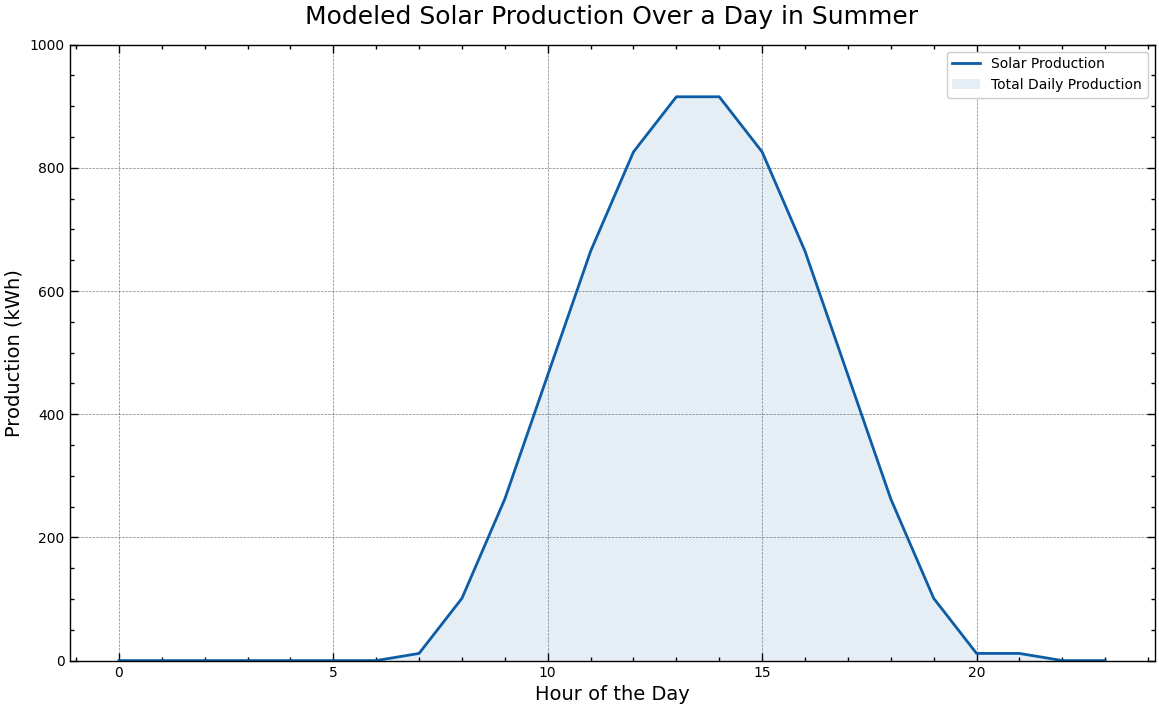

In [15]:
def generate_solar_production_sine(start_hour, end_hour, total_daily_production):
    """
    Generates a 24-hour array of solar production based on a sine wave,
    scaled to match total daily production.

    Parameters:
    - start_hour (int): Hour solar production starts (approximate sunrise).
    - end_hour (int): Hour solar production ends (approximate sunset).
    - total_daily_production (float): Total production to be produced in a day (kWh).

    Returns:
    - numpy.ndarray: 24-hour array of solar production.
    """
    hours = np.arange(24)
    production = np.zeros(24)

    # Adjust these parameters to fine-tune the sine wave shape to more closely mimic your solar production pattern
    peak_production_hour = (start_hour + end_hour - 8) / 2
    width = (end_hour - start_hour) / 2.0  # Controls the spread of the sine wave

    # Sine wave calculation
    production = 0.5 * (np.sin((hours - peak_production_hour) * np.pi / width) + 1)
    production[(hours < start_hour) | (hours > end_hour)] = 0  # Zero production outside of production hours

    # Scale the production to match the total daily production
    current_total = np.trapz(production, hours)  # Integrate to find current total production
    scaling_factor = total_daily_production / current_total
    production *= scaling_factor

    return production

# Example usage
start_hour, end_hour, total_daily_production = 7, 21, 6500
production_summer = generate_solar_production_sine(start_hour, end_hour, total_daily_production)

plt.figure(figsize=(14, 8))

plt.plot(np.arange(24), production_summer, label='Solar Production')
plt.fill_between(np.arange(24), 0, production_summer, alpha=0.1, label='Total Daily Production')
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Production (kWh)', fontsize = 14)
plt.title('Modeled Solar Production Over a Day in Summer', fontsize = 18, y = 1.02)
plt.legend(fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(0, 1000)
plt.grid(True)
plt.savefig("images\\Modeled_Solar_Production_Over_a_day_in_summer.png")
plt.show()

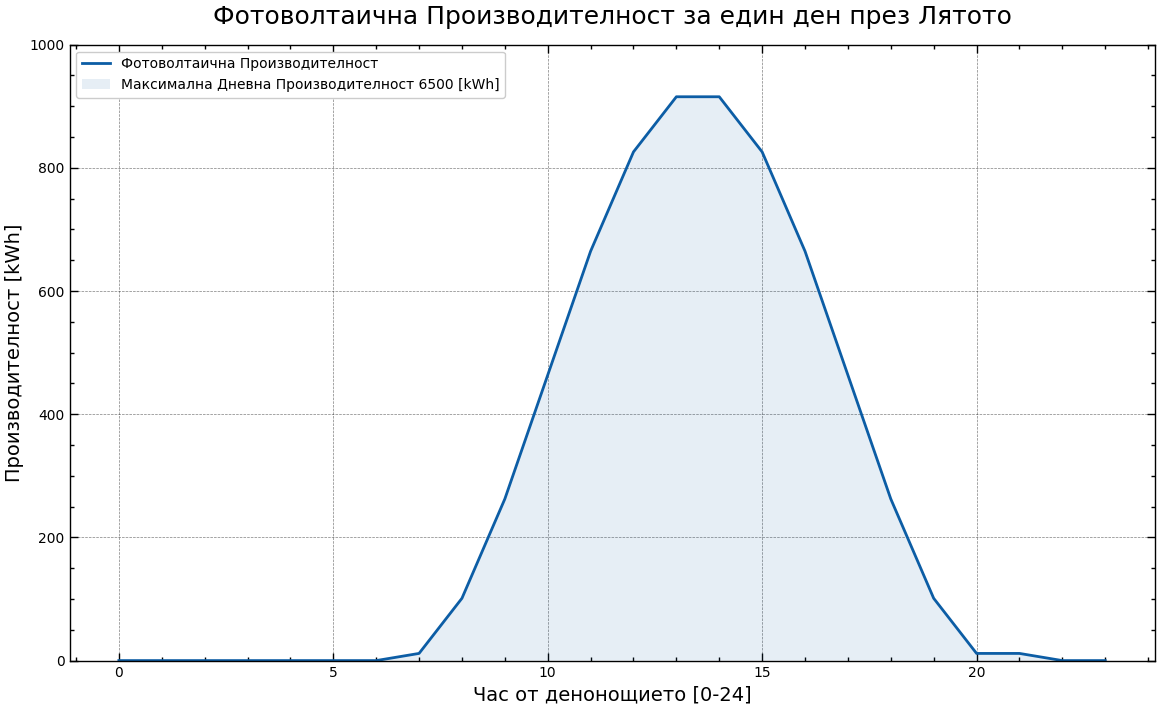

In [16]:
plt.figure(figsize=(14, 8))

plt.plot(np.arange(24), production_summer, label='Фотоволтаична Производителност')
plt.fill_between(np.arange(24), 0, production_summer, alpha=0.1, label=f'Максимална Дневна Производителност {total_daily_production} [kWh]')
plt.xlabel('Час от денонощието [0-24]', fontsize=14)
plt.ylabel('Производителност [kWh]', fontsize=14)
plt.title('Фотоволтаична Производителност за един ден през Лятото', fontsize = 18, y = 1.02)
plt.legend(fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(0, 1000)
plt.grid(True)
plt.savefig("images\\Modeled_Solar_Production_Over_a_day_in_summer_bulgarski.png")
plt.show()

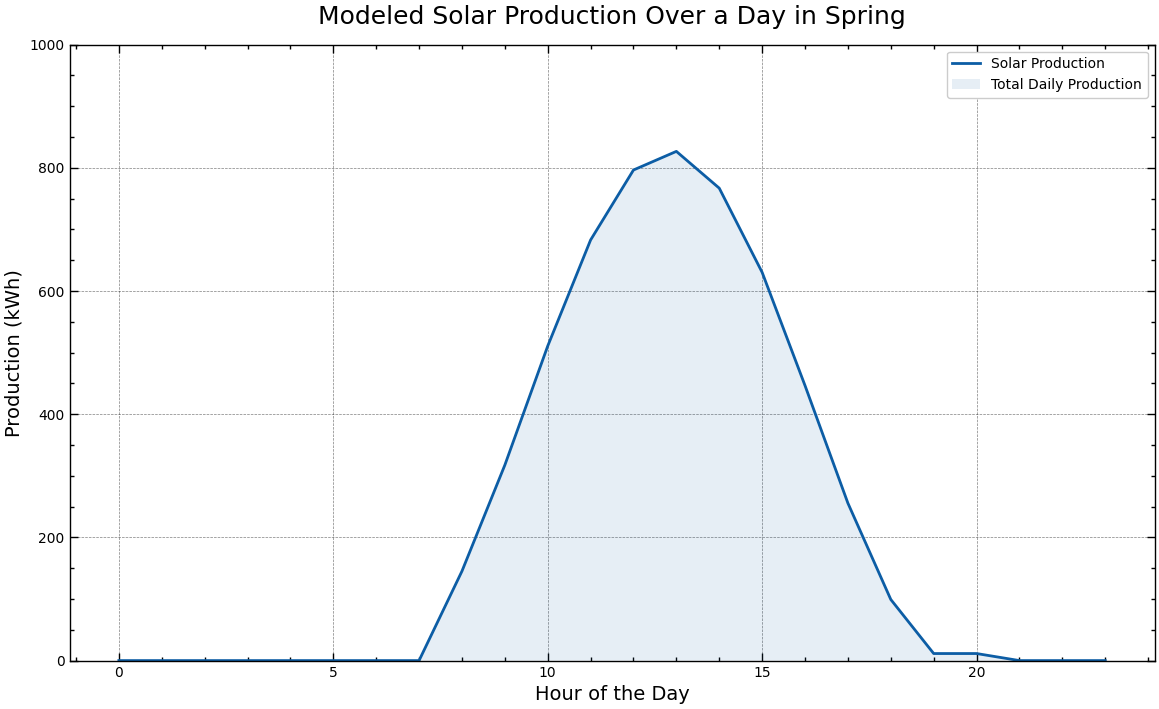

In [17]:
def generate_solar_production_sine(start_hour, end_hour, total_daily_production):
    """
    Generates a 24-hour array of solar production based on a sine wave,
    scaled to match total daily production.

    Parameters:
    - start_hour (int): Hour solar production starts (approximate sunrise).
    - end_hour (int): Hour solar production ends (approximate sunset).
    - total_daily_production (float): Total production to be produced in a day (kWh).

    Returns:
    - numpy.ndarray: 24-hour array of solar production.
    """
    hours = np.arange(24)
    production = np.zeros(24)

    # Adjust these parameters to fine-tune the sine wave shape to more closely mimic your solar production pattern
    peak_production_hour = (start_hour + end_hour - 9) / 2
    width = (end_hour - start_hour) / 1.8 # Controls the spread of the sine wave

    # Sine wave calculation
    production = 0.5 * (np.sin((hours - peak_production_hour) * np.pi / width) + 1)
    production[(hours < start_hour) | (hours > end_hour)] = 0  # Zero production outside of production hours

    # Scale the production to match the total daily production
    current_total = np.trapz(production, hours)  # Integrate to find current total production
    scaling_factor = total_daily_production / current_total
    production *= scaling_factor

    return production

# Example usage
start_hour, end_hour, total_daily_production = 8, 20, 5500
production_spring = generate_solar_production_sine(start_hour, end_hour, total_daily_production)


plt.figure(figsize=(14, 8))

plt.plot(np.arange(24), production_spring, label='Solar Production')
plt.fill_between(np.arange(24), 0, production_spring, alpha=0.1, label='Total Daily Production')
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Production (kWh)', fontsize = 14)
plt.title('Modeled Solar Production Over a Day in Spring', fontsize = 18, y = 1.02)
plt.legend(fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(0, 1000)
plt.grid(True)
plt.savefig("images\\Modeled_Solar_Production_Over_a_day_in_spring.png")
plt.show()

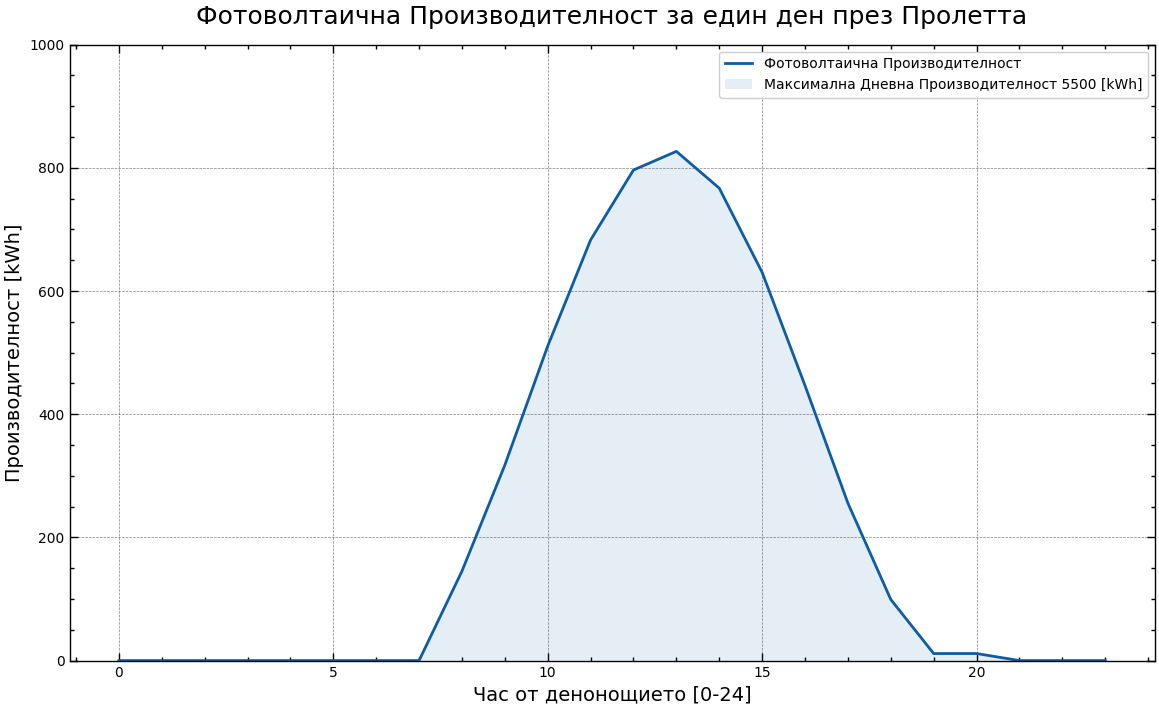

In [18]:
plt.figure(figsize=(14, 8))

plt.plot(np.arange(24), production_spring, label='Фотоволтаична Производителност')
plt.fill_between(np.arange(24), 0, production_spring, alpha=0.1, label=f'Максимална Дневна Производителност {total_daily_production} [kWh]')
plt.xlabel('Час от денонощието [0-24]', fontsize=14)
plt.ylabel('Производителност [kWh]', fontsize=14)
plt.title('Фотоволтаична Производителност за един ден през Пролетта', fontsize = 18, y = 1.02)
plt.legend(fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(0, 1000)
plt.grid(True)
plt.savefig("images\\Modeled_Solar_Production_Over_a_day_in_spring_bulgarski.png")
plt.show()

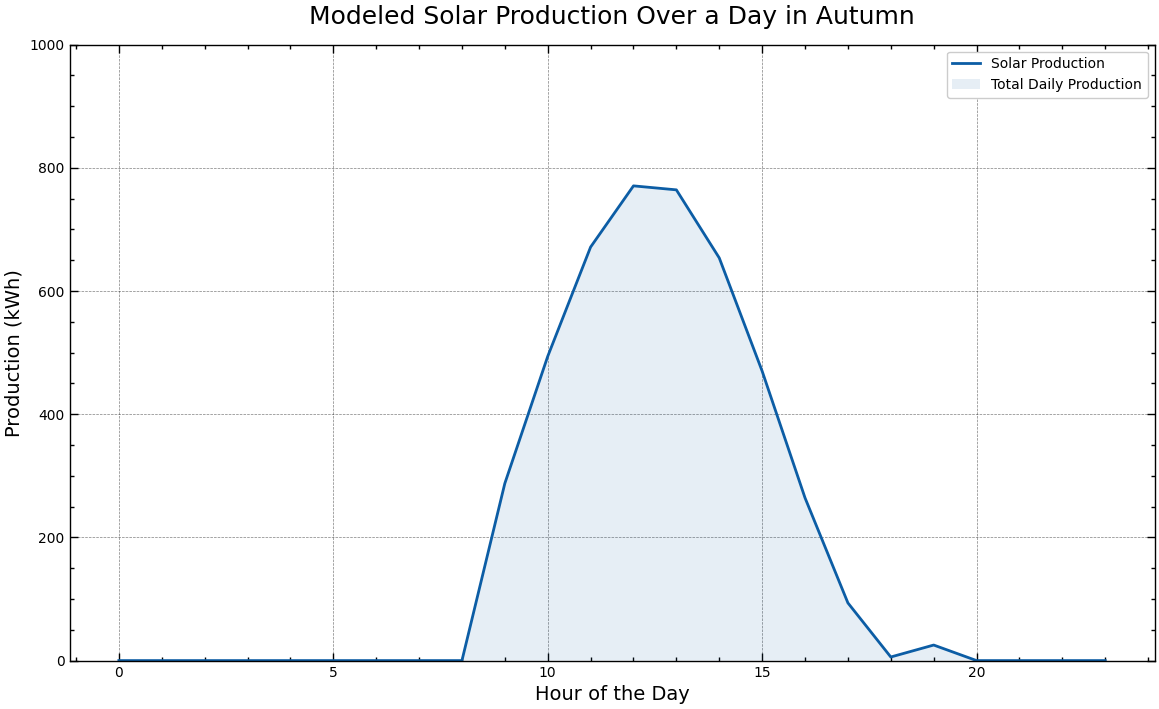

In [19]:
def generate_solar_production_sine(start_hour, end_hour, total_daily_production):
    """
    Generates a 24-hour array of solar production based on a sine wave,
    scaled to match total daily production.

    Parameters:
    - start_hour (int): Hour solar production starts (approximate sunrise).
    - end_hour (int): Hour solar production ends (approximate sunset).
    - total_daily_production (float): Total production to be produced in a day (kWh).

    Returns:
    - numpy.ndarray: 24-hour array of solar production.
    """
    hours = np.arange(24)
    production = np.zeros(24)

    # Adjust these parameters to fine-tune the sine wave shape to more closely mimic your solar production pattern
    peak_production_hour = (start_hour + end_hour - 9) / 2
    width = (end_hour - start_hour) / 1.7  # Controls the spread of the sine wave

    # Sine wave calculation
    production = 0.5 * (np.sin((hours - peak_production_hour) * np.pi / width) + 1)
    production[(hours < start_hour) | (hours > end_hour)] = 0  # Zero production outside of production hours

    # Scale the production to match the total daily production
    current_total = np.trapz(production, hours)  # Integrate to find current total production
    scaling_factor = total_daily_production / current_total
    production *= scaling_factor

    return production

# Example usage
start_hour, end_hour, total_daily_production = 9, 19, 4500
production_autumn = generate_solar_production_sine(start_hour, end_hour, total_daily_production)

plt.figure(figsize=(14, 8))

plt.plot(np.arange(24), production_autumn, label='Solar Production')
plt.fill_between(np.arange(24), 0, production_autumn, alpha=0.1, label='Total Daily Production')
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Production (kWh)', fontsize = 14)
plt.title('Modeled Solar Production Over a Day in Autumn', fontsize = 18, y = 1.02)
plt.legend(fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(0, 1000)
plt.grid(True)
plt.savefig("images\\Modeled_Solar_Production_Over_a_day_in_autumn.png")
plt.show()

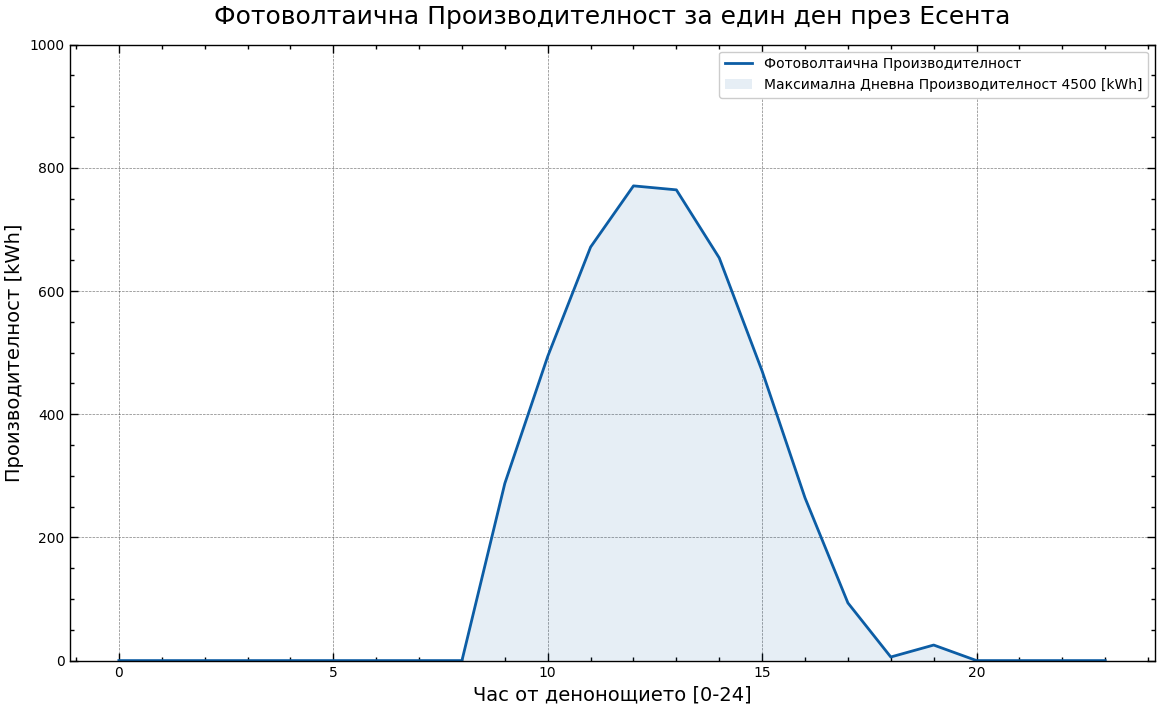

In [20]:
plt.figure(figsize=(14, 8))

plt.plot(np.arange(24), production_autumn, label='Фотоволтаична Производителност')
plt.fill_between(np.arange(24), 0, production_autumn, alpha=0.1, label=f'Максимална Дневна Производителност {total_daily_production} [kWh]')
plt.xlabel('Час от денонощието [0-24]', fontsize=14)
plt.ylabel('Производителност [kWh]', fontsize=14)
plt.title('Фотоволтаична Производителност за един ден през Есента', fontsize = 18, y = 1.02)
plt.legend(fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(0, 1000)
plt.grid(True)
plt.savefig("images\\Modeled_Solar_Production_Over_a_day_in_autumn_bulgarski.png")
plt.show()

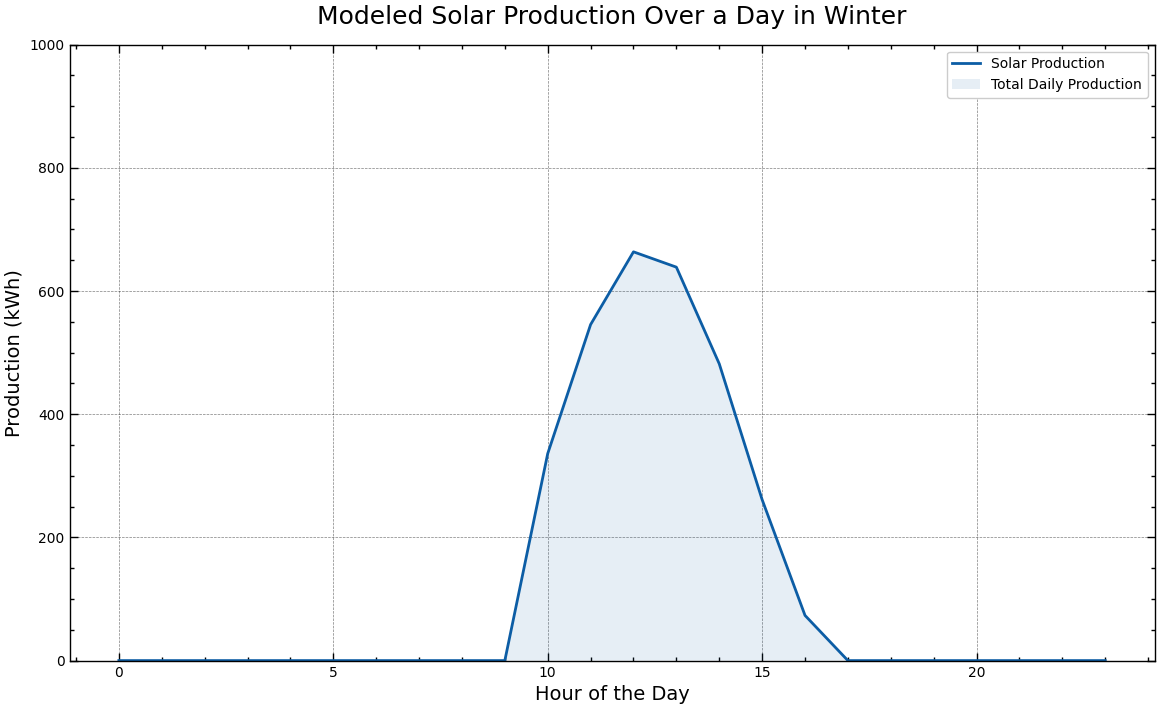

In [21]:
def generate_solar_production_sine(start_hour, end_hour, total_daily_production):
    """
    Generates a 24-hour array of solar production based on a sine wave,
    scaled to match total daily production.

    Parameters:
    - start_hour (int): Hour solar production starts (approximate sunrise).
    - end_hour (int): Hour solar production ends (approximate sunset).
    - total_daily_production (float): Total production to be produced in a day (kWh).

    Returns:
    - numpy.ndarray: 24-hour array of solar production.
    """
    hours = np.arange(24)
    production = np.zeros(24)

    # Adjust these parameters to fine-tune the sine wave shape to more closely mimic your solar production pattern
    peak_production_hour = (start_hour + end_hour - 7) / 2
    width = (end_hour - start_hour) / 1.5  # Controls the spread of the sine wave

    # Sine wave calculation
    production = 0.5 * (np.sin((hours - peak_production_hour) * np.pi / width) + 1)
    production[(hours < start_hour) | (hours > end_hour)] = 0  # Zero production outside of production hours

    # Scale the production to match the total daily production
    current_total = np.trapz(production, hours)  # Integrate to find current total production
    scaling_factor = total_daily_production / current_total
    production *= scaling_factor

    return production

# Example usage
start_hour, end_hour, total_daily_production = 10, 17, 3000
production_winter = generate_solar_production_sine(start_hour, end_hour, total_daily_production)

plt.figure(figsize=(14, 8))

plt.plot(np.arange(24), production_winter, label='Solar Production')
plt.fill_between(np.arange(24), 0, production_winter, alpha=0.1, label='Total Daily Production')
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Production (kWh)', fontsize = 14)
plt.title('Modeled Solar Production Over a Day in Winter', fontsize = 18, y = 1.02)
plt.legend(fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(0, 1000)
plt.grid(True)
plt.savefig("images\\Modeled_Solar_Production_Over_a_day_in_winter.png")
plt.show()

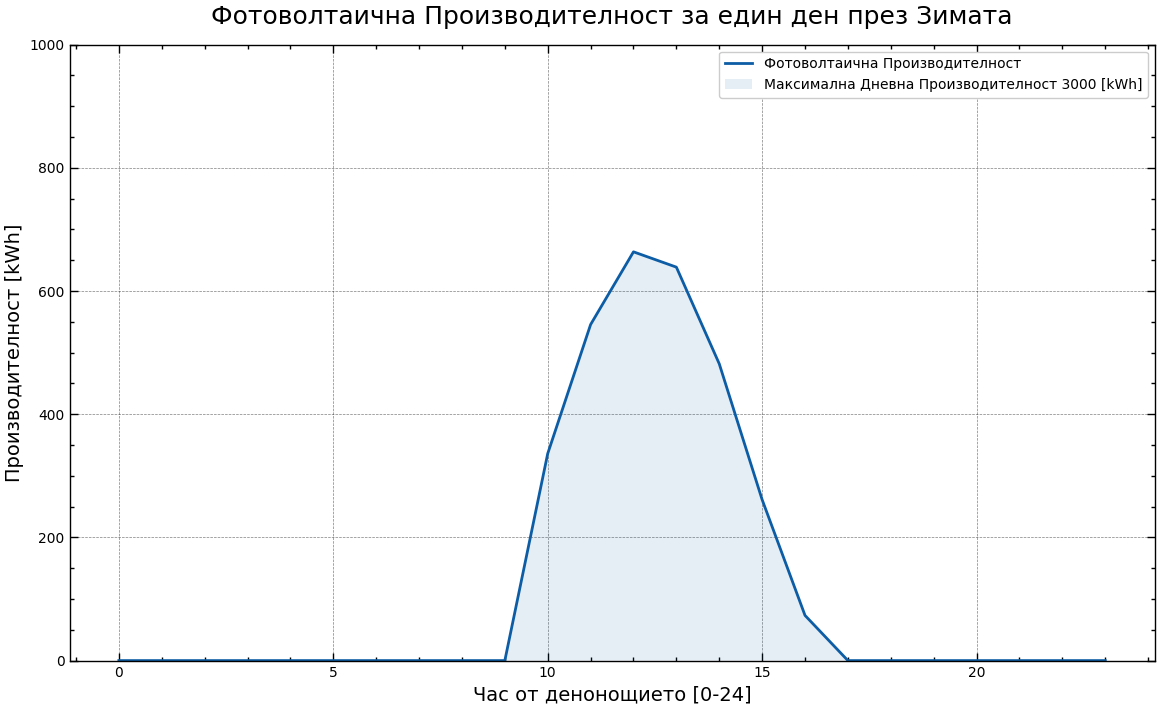

In [22]:
plt.figure(figsize=(14, 8))

plt.plot(np.arange(24), production_winter, label='Фотоволтаична Производителност')
plt.fill_between(np.arange(24), 0, production_winter, alpha=0.1, label=f'Максимална Дневна Производителност {total_daily_production} [kWh]')
plt.xlabel('Час от денонощието [0-24]', fontsize=14)
plt.ylabel('Производителност [kWh]', fontsize=14)
plt.title('Фотоволтаична Производителност за един ден през Зимата', fontsize = 18, y = 1.02)
plt.legend(fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 10)
plt.ylim(0, 1000)
plt.grid(True)
plt.savefig("images\\Modeled_Solar_Production_Over_a_day_in_winter_bulgarski.png")
plt.show()

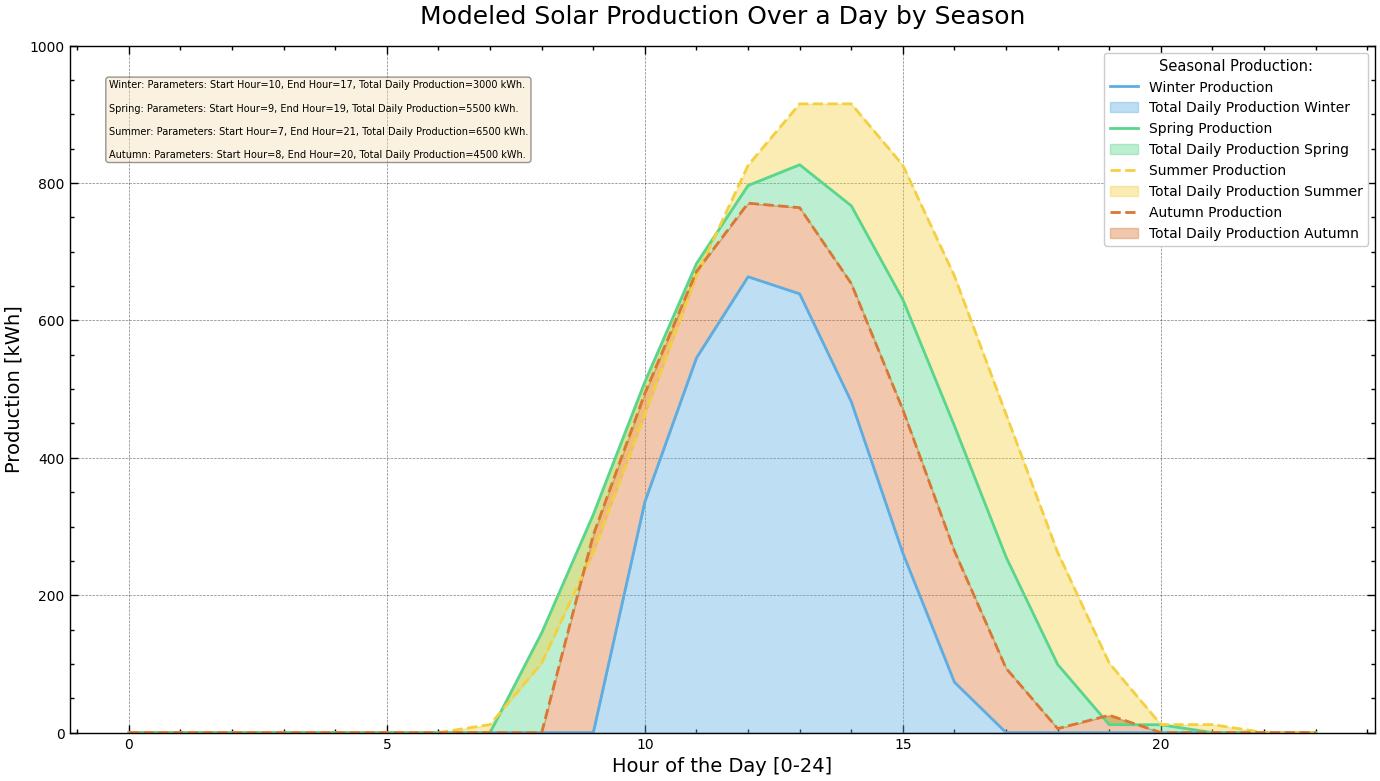

In [23]:
TEXT = """Winter: Parameters: Start Hour=10, End Hour=17, Total Daily Production=3000 kWh.\n
Spring: Parameters: Start Hour=9, End Hour=19, Total Daily Production=5500 kWh.\n
Summer: Parameters: Start Hour=7, End Hour=21, Total Daily Production=6500 kWh.\n
Autumn: Parameters: Start Hour=8, End Hour=20, Total Daily Production=4500 kWh."""

# Aggregating the modeled solar production over a day for different seasons into a single plot

plt.figure(figsize=(14, 8))

# Winter
plt.plot(np.arange(24), production_winter, label='Winter Production', color = "#5DADE2")
plt.fill_between(np.arange(24), 0, production_winter, alpha=0.4, label='Total Daily Production Winter', color = "#5DADE2")

# Spring
plt.plot(np.arange(24), production_spring, label='Spring Production', color = "#58D68D")
plt.fill_between(np.arange(24), production_autumn, production_spring, alpha=0.4, label='Total Daily Production Spring', color = "#58D68D")

# Summer
plt.plot(np.arange(24), production_summer, "--", label='Summer Production', color = "#F4D03F")
plt.fill_between(np.arange(24), production_spring, production_summer, alpha=0.4, label='Total Daily Production Summer', color = "#F4D03F")

# Autumn
plt.plot(np.arange(24), production_autumn, "--", label='Autumn Production', color = "#DC7633")
plt.fill_between(np.arange(24), production_winter, production_autumn, alpha=0.4, label='Total Daily Production Autumn', color = "#DC7633")

plt.text(0.03, 0.95, TEXT, transform=plt.gca().transAxes, fontsize=7, verticalalignment='top', bbox=props)

# Setting plot properties
plt.xlabel('Hour of the Day [0-24]', fontsize=14)
plt.ylabel('Production [kWh]', fontsize=14)
plt.title('Modeled Solar Production Over a Day by Season', fontsize=18, y=1.02)
plt.legend(title="Seasonal Production:", title_fontproperties=FontProperties(size=10.5), fontsize=10)
plt.tick_params(axis='both', labelsize=10)
plt.ylim(0, 1000)  # Adjust the y-axis limit to fit the highest production value for better visualization
plt.grid(True)
plt.tight_layout()
plt.savefig("images\\Modeled_Solar_Production_Over_a_Day.png")
plt.show()

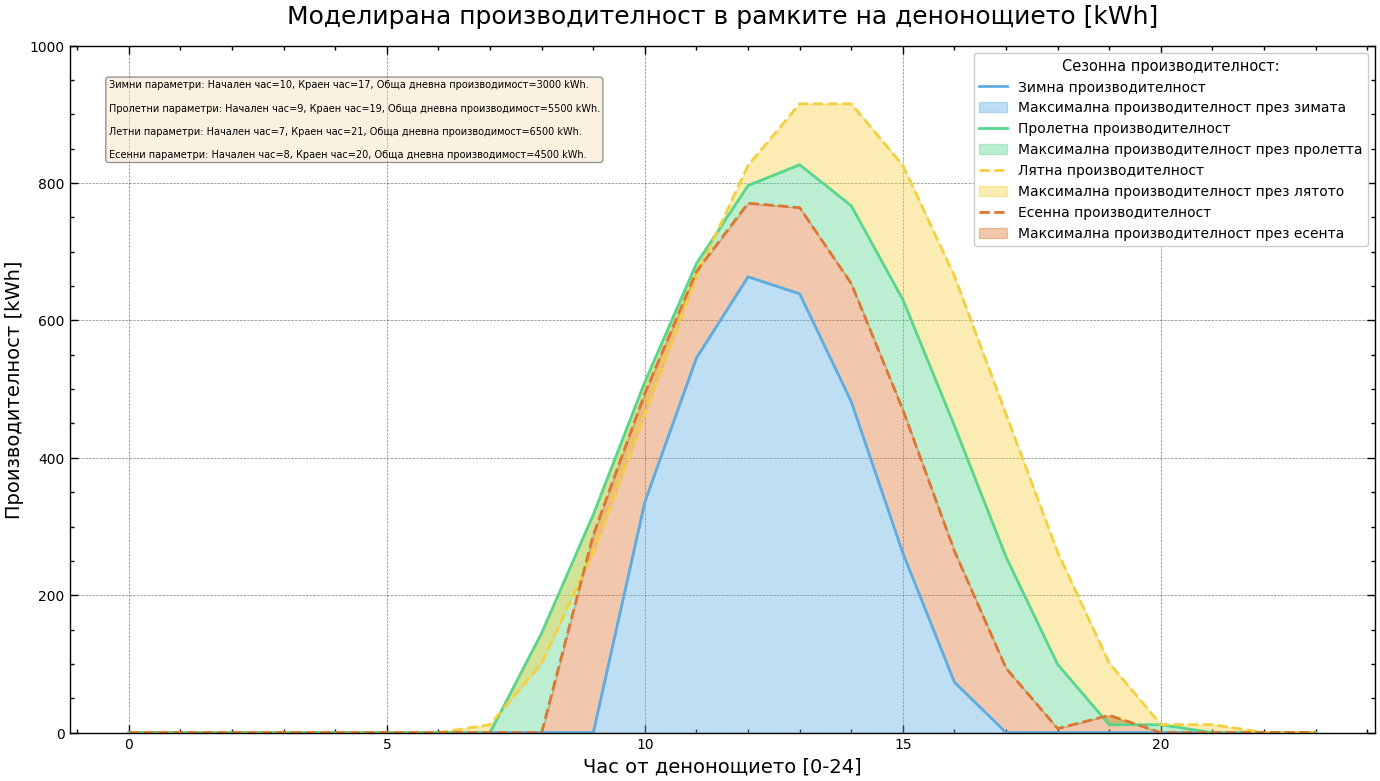

In [24]:
TEXT = """Зимни параметри: Начален час=10, Краен час=17, Обща дневна производимост=3000 kWh.\n
Пролетни параметри: Начален час=9, Краен час=19, Обща дневна производимост=5500 kWh.\n
Летни параметри: Начален час=7, Краен час=21, Обща дневна производимост=6500 kWh.\n
Есенни параметри: Начален час=8, Краен час=20, Обща дневна производимост=4500 kWh."""

plt.figure(figsize=(14, 8))

# Winter
plt.plot(np.arange(24), production_winter, label='Зимна производителност', color = "#5DADE2")
plt.fill_between(np.arange(24), 0, production_winter, alpha=0.4, label='Максимална производителност през зимата', color = "#5DADE2")

# Spring
plt.plot(np.arange(24), production_spring, label='Пролетна производителност', color = "#58D68D")
plt.fill_between(np.arange(24), production_autumn, production_spring, alpha=0.4, label='Максимална производителност през пролетта', color = "#58D68D")

# Summer
plt.plot(np.arange(24), production_summer, "--", label='Лятна производителност', color = "#F4D03F")
plt.fill_between(np.arange(24), production_spring, production_summer, alpha=0.4, label='Максимална производителност през лятото', color = "#F4D03F")

# Autumn
plt.plot(np.arange(24), production_autumn, "--", label='Есенна производителност', color = "#DC7633")
plt.fill_between(np.arange(24), production_winter, production_autumn, alpha=0.4, label='Максимална производителност през есента', color = "#DC7633")

plt.text(0.03, 0.95, TEXT, transform=plt.gca().transAxes, fontsize=7, verticalalignment='top', bbox=props)

# Setting plot properties
plt.xlabel('Час от денонощието [0-24]', fontsize=14)
plt.ylabel('Производителност [kWh]', fontsize=14)
plt.title('Моделирана производителност в рамките на денонощието [kWh]', fontsize=18, y=1.02)
plt.legend(title="Сезонна производителност:", title_fontproperties=FontProperties(size=10.5), fontsize=10)
plt.tick_params(axis='both', labelsize=10)
plt.ylim(0, 1000)  # Adjust the y-axis limit to fit the highest production value for better visualization
plt.grid(True)
plt.tight_layout()
plt.savefig("images\\Modeled_Solar_Production_Over_a_Day_bulgarski.png")
plt.show()

In [25]:
practical_financial_gain_each_day_array = np.zeros(7)

lowest_price_start = 11
lowest_price_end = 14

highest_price_start = 6
highest_price_end = 8


for day in range(data_array.shape[0]):
    # Calculate the average prices for the specified hours.
    avg_price_during_low = np.average(data_array[day, lowest_price_start:lowest_price_end])
    avg_price_during_high = np.average(data_array[day, highest_price_start:highest_price_end])
    
    # Calculate the financial gain based on the difference in average prices multiplied by the battery capacity.
    # Assuming the price data in 'data_array' is in terms of currency per MWh, and 'battery_capacity' is in MWh.
    current_day_financial_gain = battery_capacity * (avg_price_during_high - avg_price_during_low) / 1000
    
    # Store the calculated financial gain for the current day.
    practical_financial_gain_each_day_array[day] = current_day_financial_gain


# Correct variable name in the print statement.
print("Financial gain for each day of the week (BGN):")
print(sum(practical_financial_gain_each_day_array))

Financial gain for each day of the week (BGN):
588.3200000000002


In [59]:
# battery_rack_price_per_kwh = 135 * 1.7 # dollars * LEV conversion
# battery_cable_price_per_kwh = 20
# foundations_battery_racks = 24000
# battery_capacity = 1000 #kWh

# battery_lifetime_operational_cycles = 5000 # 5000 cycles 

CAPEX_1 = battery_rack_price_per_kwh * battery_capacity + foundations_battery_racks + battery_rack_price_per_kwh * 1000 
CAPEX_2 = battery_rack_price_per_kwh * battery_capacity + foundations_battery_racks + battery_rack_price_per_kwh * 1000 * 0.7
OPEX = 5000

print(CAPEX_1)

483000.0


In [60]:
max_financial_gain_each_day_array = np.zeros(7)


for day in range(data_array.shape[0]):
    # Calculate the average prices for the specified hours.
    avg_price_during_low = np.average(min(data_array[day]))
    avg_price_during_high = np.average(max(data_array[day]))
    
    # Calculate the financial gain based on the difference in average prices multiplied by the battery capacity.
    # Assuming the price data in 'data_array' is in terms of currency per MWh, and 'battery_capacity' is in MWh.
    current_day_financial_gain = battery_capacity * (avg_price_during_high - avg_price_during_low) / 1000
    
    # Store the calculated financial gain for the current day.
    max_financial_gain_each_day_array[day] = current_day_financial_gain


# Correct variable name in the print statement.
print("Financial gain for each day of the week (BGN):")
print(sum(max_financial_gain_each_day_array))

Financial gain for each day of the week (BGN):
979.53


In [85]:
years_in_use = np.arange((int(battery_lifetime_operational_cycles/365)) + 5)

max_financial_gain_total = [0]

for year in years_in_use:
    max_financial_gain_total.append(sum(max_financial_gain_each_day_array) * 52 * (year + 1))

print(max_financial_gain_total.pop())

916840.08


In [86]:
practical_financial_gain_total = [0]

for year in years_in_use:
    practical_financial_gain_total.append(sum(practical_financial_gain_each_day_array) * 52 * (year + 1))

practical_financial_gain_total.pop()

550667.5200000001

In [87]:
costs_total_1 = [CAPEX_1]
costs_total_2 = [CAPEX_2]

for year in years_in_use:
    costs_total_1.append(CAPEX_1 + (year + 1) * OPEX)
    costs_total_2.append(CAPEX_2 + (year + 1) * OPEX)

costs_total_1.pop()
costs_total_2.pop()

504150.0

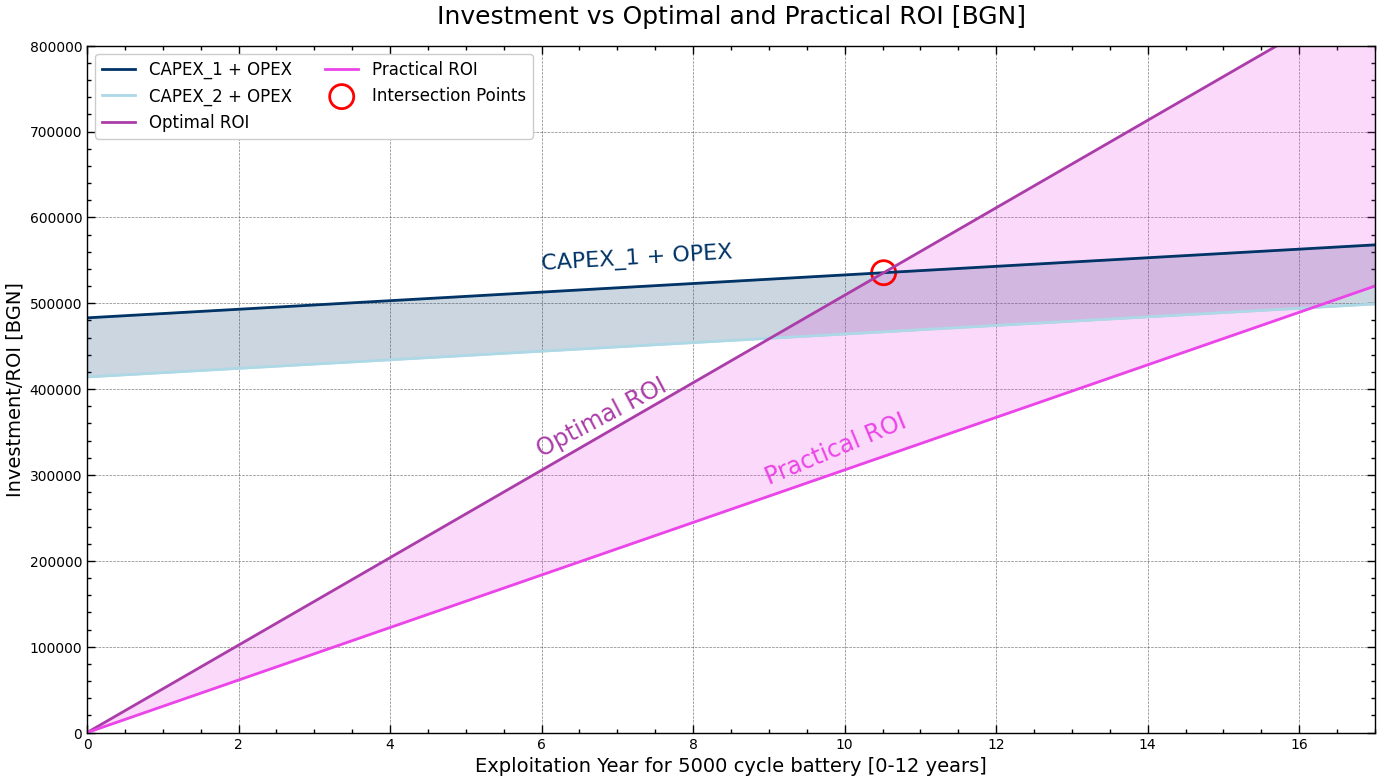

In [131]:
color_1 =  "#ab3da9"
color_2 = "#eb44e8" 
color_3 = "#003366"
color_4 = "#add8e6"

x1 = CAPEX_1 / ((max_financial_gain_total[1] - OPEX))
x2 = CAPEX_1 / ((practical_financial_gain_total[1] - OPEX))

y1 = CAPEX_1 + x1 * OPEX
y2 = CAPEX_1 + x2 * OPEX

intersect_x = [x1, x2]
intersect_y = [y1, y2]

plt.figure(figsize = (14, 8))

plt.plot(years_in_use, costs_total_1, label = "CAPEX_1 + OPEX", color = color_3)
plt.plot(years_in_use, costs_total_2, label = "CAPEX_2 + OPEX", color = color_4)

plt.fill_between(years_in_use, costs_total_1, costs_total_2, color = color_3, alpha = 0.2)

plt.plot(years_in_use, max_financial_gain_total, color = color_1, label = "Optimal ROI")
plt.plot(years_in_use, practical_financial_gain_total, color = color_2, label = "Practical ROI")
plt.fill_between(years_in_use, max_financial_gain_total, practical_financial_gain_total, color = color_2, alpha = 0.2)


plt.xlabel('Exploitation Year for 5000 cycle battery [0-12 years]', fontsize=14)
plt.ylabel('Investment/ROI [BGN]', fontsize=14)
plt.title('Investment vs Optimal and Practical ROI [BGN]', fontsize=18, y=1.02)

plt.scatter(intersect_x, intersect_y, color="red", s=300, label="Intersection Points", facecolors='none', edgecolors='red', linewidths=2)  # Draw circles at intersections

leg = plt.legend(fontsize=12, ncol = 2)

x_text = 6
y_text_index = np.abs(years_in_use - x_text).argmin()  # Find the index of the chosen x in the data
y_text = max_financial_gain_total[y_text_index] * 1.05  # Get the corresponding y value

# Calculate slope (m) for "Optimal ROI" curve
# This is a simplistic approach for demonstration purposes
# A more accurate method might involve calculating the derivative at the point of interest
delta_x = years_in_use[1] - years_in_use[0]
delta_y = max_financial_gain_total[1] - max_financial_gain_total[0]
slope = delta_y / delta_x

plt.text(x_text, y_text, 'Optimal ROI', fontsize=17, rotation=math.radians(1600), rotation_mode='anchor', color=color_1)

x_text = 9
y_text_index = np.abs(years_in_use - x_text).argmin()  # Find the index of the chosen x in the data
y_text = practical_financial_gain_total[y_text_index] * 1.05  # Get the corresponding y value

plt.text(x_text, y_text, 'Practical ROI', fontsize=17, rotation=math.radians(1300), rotation_mode='anchor', color=color_2)

x_text = 6
y_text_index = np.abs(years_in_use - x_text).argmin()  # Find the index of the chosen x in the data
y_text = costs_total_1[y_text_index] * 1.05  # Get the corresponding y value

plt.text(x_text, y_text, 'CAPEX_1 + OPEX', fontsize=16, rotation=math.radians(200), rotation_mode='anchor', color=color_3)

plt.tick_params(axis='both', labelsize=10)
plt.xlim(0, years_in_use[-1])
plt.ylim(0, 800000)  # Adjust the y-axis limit to fit the highest production value for better visualization
plt.grid(True)
plt.tight_layout()
plt.savefig("images\\Cost_and_Gain.png")
plt.show()

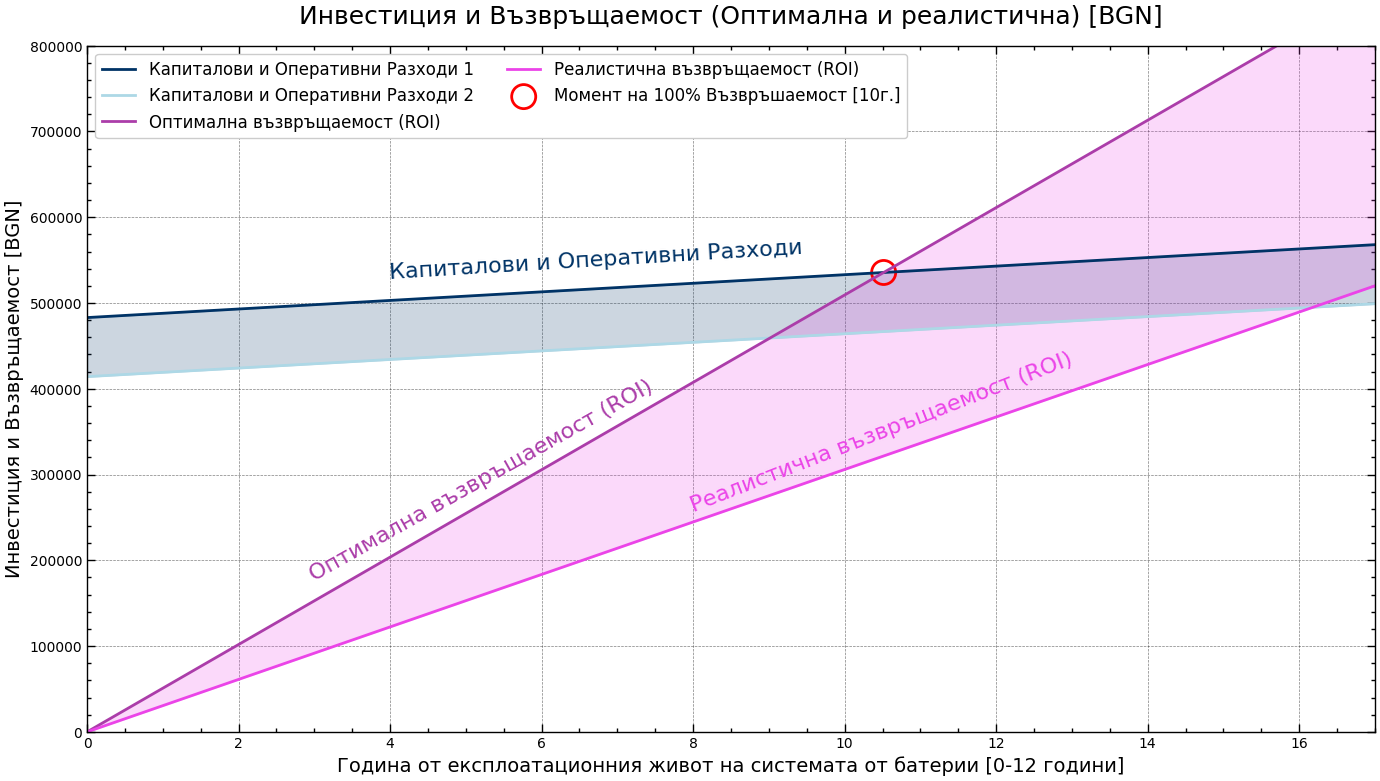

In [146]:
color_1 =  "#ab3da9"
color_2 = "#eb44e8" 

plt.figure(figsize = (14, 8))

plt.plot(years_in_use, costs_total_1, label = "Капиталови и Оперативни Разходи 1", color = color_3)
plt.plot(years_in_use, costs_total_2, label = "Капиталови и Оперативни Разходи 2", color = color_4)

plt.fill_between(years_in_use, costs_total_1, costs_total_2, color = color_3, alpha = 0.2)

plt.plot(years_in_use, max_financial_gain_total, color = color_1, label = "Оптимална възвръщаемост (ROI)")
plt.plot(years_in_use, practical_financial_gain_total, color = color_2, label = "Реалистична възвръщаемост (ROI)")
plt.fill_between(years_in_use, max_financial_gain_total, practical_financial_gain_total, color = color_2, alpha = 0.2)

plt.xlabel('Година от експлоатационния живот на системата от батерии [0-12 години]', fontsize=14)
plt.ylabel('Инвестиция и Възвръщаемост [BGN]', fontsize=14)
plt.title('Инвестиция и Възвръщаемост (Оптимална и реалистична) [BGN]', fontsize=18, y=1.02)

plt.scatter(intersect_x, intersect_y, color="red", s=300, label="Момент на 100% Възвръшаемост [10г.]", facecolors='none', edgecolors='red', linewidths=2)  # Draw circles at intersections

leg = plt.legend(fontsize=12, ncol = 2)

x_text = 3
y_text_index = np.abs(years_in_use - x_text).argmin()  # Find the index of the chosen x in the data
y_text = max_financial_gain_total[y_text_index] * 1.15  # Get the corresponding y value

# Calculate slope (m) for "Optimal ROI" curve
# This is a simplistic approach for demonstration purposes
# A more accurate method might involve calculating the derivative at the point of interest
delta_x = years_in_use[1] - years_in_use[0]
delta_y = max_financial_gain_total[1] - max_financial_gain_total[0]
slope = delta_y / delta_x

plt.text(x_text, y_text, 'Оптимална възвръщаемост (ROI)', fontsize=16, rotation=math.radians(1680), rotation_mode='anchor', color=color_1)

x_text = 8
y_text_index = np.abs(years_in_use - x_text).argmin()  # Find the index of the chosen x in the data
y_text = practical_financial_gain_total[y_text_index] * 1.05# Get the corresponding y value

plt.text(x_text, y_text, 'Реалистична възвръщаемост (ROI)', fontsize=16, rotation=math.radians(1220), rotation_mode='anchor', color=color_2)

x_text = 4
y_text_index = np.abs(years_in_use - x_text).argmin()  # Find the index of the chosen x in the data
y_text = costs_total_1[y_text_index] * 1.05  # Get the corresponding y value

plt.text(x_text, y_text, 'Капиталови и Оперативни Разходи', fontsize=16, rotation=math.radians(200), rotation_mode='anchor', color=color_3)

plt.tick_params(axis='both', labelsize=10)
plt.xlim(0, years_in_use[-1])
plt.ylim(0, 800000)  # Adjust the y-axis limit to fit the highest production value for better visualization
plt.grid(True)
plt.tight_layout()
plt.savefig("images\\Cost_and_Gain_bulgarski.png")
plt.show()